# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data exploration

In [2]:
df= pd.read_csv("pokemon.csv")

In [3]:
df

abilities  against_bug  against_dark  against_dragon   
0    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0  \
1    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
2    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
3       ['Blaze', 'Solar Power']         0.50           1.0             1.0   
4       ['Blaze', 'Solar Power']         0.50           1.0             1.0   
..                           ...          ...           ...             ...   
796              ['Beast Boost']         0.25           1.0             0.5   
797              ['Beast Boost']         1.00           1.0             0.5   
798              ['Beast Boost']         2.00           0.5             2.0   
799              ['Prism Armor']         2.00           2.0             1.0   
800               ['Soul-Heart']         0.25           0.5             0.0   

     against_electric  against_fairy  against_fight  against_fire   
0                 0.5            0.5            0.5           2.0  \
1                 0.5            0.5            0.5           2.0   
2                 0.5            0.5            0.5           2.0   
3                 1.0            0.5            1.0           0.5   
4                 1.0            0.5            1.0           0.5   
..                ...            ...            ...           ...   
796               2.0            0.5            1.0           2.0   
797               0.5            0.5            2.0           4.0   
798               0.5            4.0            2.0           0.5   
799               1.0            1.0            0.5           1.0   
800               1.0            0.5            1.0           2.0   

     against_flying  against_ghost  ...  percentage_male  pokedex_number   
0               2.0            1.0  ...             88.1               1  \
1               2.0            1.0  ...             88.1               2   
2               2.0            1.0  ...             88.1               3   
3               1.0            1.0  ...             88.1               4   
4               1.0            1.0  ...             88.1               5   
..              ...            ...  ...              ...             ...   
796             0.5            1.0  ...              NaN             797   
797             1.0            1.0  ...              NaN             798   
798             1.0            0.5  ...              NaN             799   
799             1.0            2.0  ...              NaN             800   
800             0.5            1.0  ...              NaN             801   

     sp_attack  sp_defense  speed    type1   type2  weight_kg  generation   
0           65          65     45    grass  poison        6.9           1  \
1           80          80     60    grass  poison       13.0           1   
2          122         120     80    grass  poison      100.0           1   
3           60          50     65     fire     NaN        8.5           1   
4           80          65     80     fire     NaN       19.0           1   
..         ...         ...    ...      ...     ...        ...         ...   
796        107         101     61    steel  flying      999.9           7   
797         59          31    109    grass   steel        0.1           7   
798         97          53     43     dark  dragon      888.0           7   
799        127          89     79  psychic     NaN      230.0           7   
800        130         115     65    steel   fairy       80.5           7   

     is_legendary  
0               0  
1               0  
2               0  
3               0  
4               0  
..            ...  
796             1  
797             1  
798             1  
799             1  
800             1  

[801 rows x 41 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

#### Abilities describe the special abilities the pokemon has, but they will not be analysed in the scope of this eksploratory data analysis. Other columns which will be removed from this analysis are base eggs steps, base happieness, classification, japanese name, percentage male and pokedox number. The following 18 columns contain a multiplier used to calculate the damage given pokemon will take in a combat against certain type of attack, which will be most probably given by attacking pokemon of certain type. So for example water pokemon will be more resistant to fire type of attack than for example electric type of attack. Next group of columns is related to combat statistics such as attack, defense, special attack, special defense, speed (attack speed), hp (hit points) and base total which is the summary of basic combat statistics. Than we have capture rate which describes how hard or easy it is to catch certain pokemon and experience growth which describes how fast pokemon can gain experience. The remaining columns describe parameters such as height, weight, generation the pokemon was released and if it belongs or not to legendary pokemon. Two very important columns are type 1 and type 2, type one describes primary type of pokemon, and type 2 secondary type of pokemon. Some pokemon are only single typed and some double typed, and combination of types can help in lowering the risk of damage by certain combination of multipliers.

In [5]:
df.describe().transpose()

count          mean            std        min        25%   
against_bug        801.0  9.962547e-01       0.597248       0.25        0.5  \
against_dark       801.0  1.057116e+00       0.438142       0.25        1.0   
against_dragon     801.0  9.687890e-01       0.353058       0.00        1.0   
against_electric   801.0  1.073970e+00       0.654962       0.00        0.5   
against_fairy      801.0  1.068976e+00       0.522167       0.25        1.0   
against_fight      801.0  1.065543e+00       0.717251       0.00        0.5   
against_fire       801.0  1.135456e+00       0.691853       0.25        0.5   
against_flying     801.0  1.192884e+00       0.604488       0.25        1.0   
against_ghost      801.0  9.850187e-01       0.558256       0.00        1.0   
against_grass      801.0  1.034020e+00       0.788896       0.25        0.5   
against_ground     801.0  1.098002e+00       0.738818       0.00        1.0   
against_ice        801.0  1.208177e+00       0.735356       0.25        0.5   
against_normal     801.0  8.870162e-01       0.266106       0.00        1.0   
against_poison     801.0  9.753433e-01       0.549375       0.00        0.5   
against_psychic    801.0  1.005306e+00       0.495183       0.00        1.0   
against_rock       801.0  1.250312e+00       0.697148       0.25        1.0   
against_steel      801.0  9.834582e-01       0.500117       0.25        0.5   
against_water      801.0  1.058365e+00       0.606562       0.25        0.5   
attack             801.0  7.785768e+01      32.158820       5.00       55.0   
base_egg_steps     801.0  7.191011e+03    6558.220422    1280.00     5120.0   
base_happiness     801.0  6.536205e+01      19.598948       0.00       70.0   
base_total         801.0  4.283770e+02     119.203577     180.00      320.0   
defense            801.0  7.300874e+01      30.769159       5.00       50.0   
experience_growth  801.0  1.054996e+06  160255.835096  600000.00  1000000.0   
height_m           781.0  1.163892e+00       1.080326       0.10        0.6   
hp                 801.0  6.895880e+01      26.576015       1.00       50.0   
percentage_male    703.0  5.515576e+01      20.261623       0.00       50.0   
pokedex_number     801.0  4.010000e+02     231.373075       1.00      201.0   
sp_attack          801.0  7.130587e+01      32.353826      10.00       45.0   
sp_defense         801.0  7.091136e+01      27.942501      20.00       50.0   
speed              801.0  6.633458e+01      28.907662       5.00       45.0   
weight_kg          781.0  6.137810e+01     109.354766       0.10        9.0   
generation         801.0  3.690387e+00       1.930420       1.00        2.0   
is_legendary       801.0  8.739076e-02       0.282583       0.00        0.0   

                         50%        75%        max  
against_bug              1.0        1.0        4.0  
against_dark             1.0        1.0        4.0  
against_dragon           1.0        1.0        2.0  
against_electric         1.0        1.0        4.0  
against_fairy            1.0        1.0        4.0  
against_fight            1.0        1.0        4.0  
against_fire             1.0        2.0        4.0  
against_flying           1.0        1.0        4.0  
against_ghost            1.0        1.0        4.0  
against_grass            1.0        1.0        4.0  
against_ground           1.0        1.0        4.0  
against_ice              1.0        2.0        4.0  
against_normal           1.0        1.0        1.0  
against_poison           1.0        1.0        4.0  
against_psychic          1.0        1.0        4.0  
against_rock             1.0        2.0        4.0  
against_steel            1.0        1.0        4.0  
against_water            1.0        1.0        4.0  
attack                  75.0      100.0      185.0  
base_egg_steps        5120.0     6400.0    30720.0  
base_happiness          70.0       70.0      140.0  
base_total             435.0      505.0      780.0  
defense                 70.0      

In [6]:
df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


## Data Cleaning and replacing missing values

#### Most missing values are at column "type2", because that many pokemon are only of one type, the missing values will be replaced with "None".
#### Next column is "percantage_male" - this column will not be used for further analysis.
#### Remaining two columns with missing values are "Height_m" and "Weight_kg", and 20 missing values are for the same pokemon for both columns. They will be replaced with median weight and height for given type


In [7]:
# Swapping Name as first column
first_column = df.pop('name')
df.insert(0, 'name', first_column)

In [8]:
df.groupby('type1')['weight_kg'].median()

type1
bug         15.75
dark        30.00
dragon      60.00
electric    21.50
fairy        6.25
fighting    44.00
fire        36.25
flying      63.00
ghost       15.00
grass       14.50
ground      68.00
ice         55.40
normal      24.90
poison      21.10
psychic     19.05
rock        57.00
steel       80.75
water       26.00
Name: weight_kg, dtype: float64

In [9]:
df.groupby('type1')['height_m'].median()

type1
bug         0.80
dark        1.00
dragon      1.60
electric    0.80
fairy       0.60
fighting    1.25
fire        1.00
flying      1.50
ghost       1.00
grass       0.80
ground      1.10
ice         1.10
normal      1.00
poison      0.95
psychic     0.85
rock        1.20
steel       0.95
water       1.00
Name: height_m, dtype: float64

In [10]:
df_null_values =df[df['height_m'].isnull()]
df_null_values

name                                          abilities   
18     Rattata  ['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...  \
19    Raticate  ['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...   
25      Raichu         ['Static', 'Lightningrod', 'Surge Surfer']   
26   Sandshrew  ['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...   
27   Sandslash  ['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...   
36      Vulpix  ['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...   
37   Ninetales  ['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...   
49     Diglett  ['Sand Veil', 'Arena Trap', 'Sand Force', 'San...   
50     Dugtrio  ['Sand Veil', 'Arena Trap', 'Sand Force', 'San...   
51      Meowth  ['Pickup', 'Technician', 'Unnerve', 'Pickup', ...   
52     Persian  ['Limber', 'Technician', 'Unnerve', 'Fur Coat'...   
73     Geodude  ['Rock Head', 'Sturdy', 'Sand Veil', 'Magnet P...   
74    Graveler  ['Rock Head', 'Sturdy', 'Sand Veil', 'Magnet P...   
75       Golem  ['Rock Head', 'Sturdy', 'Sand Veil', 'Magnet P...   
87      Grimer  ['Stench', 'Sticky Hold', 'Poison Touch', 'Poi...   
88         Muk  ['Stench', 'Sticky Hold', 'Poison Touch', 'Poi...   
102  Exeggutor     ['Chlorophyll', 'Harvest', 'Frisk', 'Harvest']   
104    Marowak  ['Rock Head', 'Lightningrod', 'Battle Armor', ...   
719      Hoopa                                       ['Magician']   
744   Lycanroc  ['Keen Eye', 'Sand Rush', 'Steadfast', 'Keen E...   

     against_bug  against_dark  against_dragon  against_electric   
18           1.0           1.0             1.0               1.0  \
19           1.0           1.0             1.0               1.0   
25           1.0           1.0             1.0               0.5   
26           1.0           1.0             1.0               0.0   
27           1.0           1.0             1.0               0.0   
36           0.5           1.0             1.0               1.0   
37           0.5           1.0             1.0               1.0   
49           1.0           1.0             1.0               0.0   
50           1.0           1.0             1.0               0.0   
51           1.0           1.0             1.0               1.0   
52           1.0           1.0             1.0               1.0   
73           1.0           1.0             1.0               0.0   
74           1.0           1.0             1.0               0.0   
75           1.0           1.0             1.0               0.0   
87           0.5           1.0             1.0               1.0   
88           0.5           1.0             1.0               1.0   
102          4.0           2.0             1.0               0.5   
104          1.0           1.0             1.0               0.0   
719          1.0           4.0             1.0               1.0   
744          1.0           1.0             1.0               1.0   

     against_fairy  against_fight  against_fire  against_flying  ...   
18             1.0            2.0           1.0             1.0  ...  \
19             1.0            2.0           1.0             1.0  ...   
25             1.0            1.0           1.0             0.5  ...   
26             1.0            1.0           1.0             1.0  ...   
27             1.0            1.0           1.0             1.0  ...   
36             0.5            1.0           0.5             1.0  ...   
37             0.5            1.0           0.5             1.0  ...   
49             1.0            1.0           1.0             1.0  ...   
50             1.0            1.0           1.0             1.0  ...   
51             1.0            2.0           1.0             1.0  ...   
52             1.0            2.0           1.0             1.0  ...   
73             1.0            2.0           0.5             0.5  ...   
74             1.0            2.0           0.5             0.5  ...   
75             1.0            2.0           0.5             0.5  ...   
87             0.5            0.5           1.0    

In [11]:
# Replace missing values in Type2 with None and 20 missing values of height and weight with median by Type1
df['type2'].fillna('None', inplace=True)
df['percentage_male'].fillna('None', inplace=True) 
df['height_m']=df['height_m'].fillna(df.groupby('type1')['height_m'].transform('median')) 
df['weight_kg'] = df['weight_kg'].fillna(df.groupby('type1')['weight_kg'].transform('median'))

In [12]:
# Replacing incorrect value
df["capture_rate"].replace({'30 (Meteorite)255 (Core)': '30'}, inplace=True)
df['capture_rate'] = df['capture_rate'].astype('int')
df['capture_rate'].dtype

dtype('int32')

# Data transformation

In [13]:
# Removing 3 irrelevant columns 
df.drop(columns=['japanese_name', 'pokedex_number', 'percentage_male'], axis=1, inplace=True) 
# adding total abilities that a pokemon has
df["tot_abilities"] = df.apply(lambda x: len(x["abilities"].split(',')), axis=1)

In [14]:
# Adding new column Type_binary (if only Type1 and Type2 None = 0, if Type2 else than None = 1)
df['type_binary'] =  df.apply(lambda x: "None" if x['type2']=='None' else "Yes", axis=1)

# Adding new column Type with both values of Type1 and Type2 
df['type'] =  df.apply(lambda x: x['type1'] if x['type2']=='None' else f'{x["type1"]} {x["type2"]}', axis=1)

# Adding new column that calculates mean multiplier on 18 columns by type
df['avg_multiplier'] = df.iloc[:,2:20].mean(axis=1)

#### In order to obtain one column with each type for each pokemon dataframe will be transformeed by duplicating each row and replacing duplicated "type1" value with "type2" value. If pokemon has just one type- it will have just one row of data, if pokemon has two types- it will have two rows of data.This will allow for further data analysis and grouping values of major statistics such as "base_total", "attack", "defence", "speed", "hit_points", "capture_rate", "Weight", "height" by type.

In [15]:
columns =df.columns
columns

Index(['name', 'abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary', 'tot_abilities', 'type_binary', 'type',
       'avg_multiplier'],
      dtype='object')

In [16]:
# duplicating each row
df_type= pd.DataFrame(np.repeat(df.values, 2, axis=0))

# reassigning column names to dataframe  
df_type.columns = columns

# replacing duplicated same type in few cases by NaN
df_type.type2 = np.where(df_type.type2 == df_type.type1, np.nan, df_type.type2) 

# replacing the value of Type 1 with Type 2 in duplicated rows
df_type.type1 = np.where(df_type.index % 2 == 0, df_type.type2, df_type.type1)

# deleting duplicated rows of Type 1 that didnt have Type 2
df_type = df_type[df_type['type1']!='None']

# deleting unnecessary columns
df_type = df_type.drop(columns=['against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water','type2','type_binary', 'type','avg_multiplier','base_egg_steps', 'base_happiness','classfication'], axis=1)

In [17]:
df_type.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1218 entries, 0 to 1601
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1218 non-null   object
 1   abilities          1218 non-null   object
 2   attack             1218 non-null   object
 3   base_total         1218 non-null   object
 4   capture_rate       1218 non-null   object
 5   defense            1218 non-null   object
 6   experience_growth  1218 non-null   object
 7   height_m           1218 non-null   object
 8   hp                 1218 non-null   object
 9   sp_attack          1218 non-null   object
 10  sp_defense         1218 non-null   object
 11  speed              1218 non-null   object
 12  type1              1211 non-null   object
 13  weight_kg          1218 non-null   object
 14  generation         1218 non-null   object
 15  is_legendary       1218 non-null   object
 16  tot_abilities      1218 non-null   object
dtype

In [18]:
df_type.columns

Index(['name', 'abilities', 'attack', 'base_total', 'capture_rate', 'defense',
       'experience_growth', 'height_m', 'hp', 'sp_attack', 'sp_defense',
       'speed', 'type1', 'weight_kg', 'generation', 'is_legendary',
       'tot_abilities'],
      dtype='object')

In [19]:
# changing the feature types back to int and float
columns_int = ['attack','base_total','capture_rate','defense','experience_growth','hp','sp_attack','sp_defense','speed', 'generation','is_legendary', 'tot_abilities']
for column in columns_int:
    df_type[column]=df_type[column].astype(str).astype(int)
    
df_type[[ 'weight_kg', 'height_m']]=df_type[['weight_kg', 'height_m']].astype(str).astype(float)

In [20]:
df_type.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1218 entries, 0 to 1601
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1218 non-null   object 
 1   abilities          1218 non-null   object 
 2   attack             1218 non-null   int32  
 3   base_total         1218 non-null   int32  
 4   capture_rate       1218 non-null   int32  
 5   defense            1218 non-null   int32  
 6   experience_growth  1218 non-null   int32  
 7   height_m           1218 non-null   float64
 8   hp                 1218 non-null   int32  
 9   sp_attack          1218 non-null   int32  
 10  sp_defense         1218 non-null   int32  
 11  speed              1218 non-null   int32  
 12  type1              1211 non-null   object 
 13  weight_kg          1218 non-null   float64
 14  generation         1218 non-null   int32  
 15  is_legendary       1218 non-null   int32  
 16  tot_abilities      1218 non-n

In [21]:
df_type.set_index('name')

abilities  attack  base_total  capture_rate   
name                                                                       
Bulbasaur  ['Overgrow', 'Chlorophyll']      49         318            45  \
Bulbasaur  ['Overgrow', 'Chlorophyll']      49         318            45   
Ivysaur    ['Overgrow', 'Chlorophyll']      62         405            45   
Ivysaur    ['Overgrow', 'Chlorophyll']      62         405            45   
Venusaur   ['Overgrow', 'Chlorophyll']     100         625            45   
...                                ...     ...         ...           ...   
Guzzlord               ['Beast Boost']     101         570            15   
Guzzlord               ['Beast Boost']     101         570            15   
Necrozma               ['Prism Armor']     107         600             3   
Magearna                ['Soul-Heart']      95         600             3   
Magearna                ['Soul-Heart']      95         600             3   

           defense  experience_growth  height_m   hp  sp_attack  sp_defense   
name                                                                          
Bulbasaur       49            1059860       0.7   45         65          65  \
Bulbasaur       49            1059860       0.7   45         65          65   
Ivysaur         63            1059860       1.0   60         80          80   
Ivysaur         63            1059860       1.0   60         80          80   
Venusaur       123            1059860       2.0   80        122         120   
...            ...                ...       ...  ...        ...         ...   
Guzzlord        53            1250000       5.5  223         97          53   
Guzzlord        53            1250000       5.5  223         97          53   
Necrozma       101            1250000       2.4   97        127          89   
Magearna       115            1250000       1.0   80        130         115   
Magearna       115            1250000       1.0   80        130         115   

           speed    type1  weight_kg  generation  is_legendary  tot_abilities  
name                                                                           
Bulbasaur     45   poison        6.9           1             0              2  
Bulbasaur     45    grass        6.9           1             0              2  
Ivysaur       60   poison       13.0           1             0              2  
Ivysaur       60    grass       13.0           1             0              2  
Venusaur      80   poison      100.0           1             0              2  
...          ...      ...        ...         ...           ...            ...  
Guzzlord      43   dragon      888.0           7             1              1  
Guzzlord      43     dark      888.0           7             1              1  
Necrozma      79  psychic      230.0           7             1              1  
Magearna      65    fairy       80.5           7             1              1  
Magearna      65    steel       80.5           7             1              1  

[1218 rows x 16 columns]

# Exploratory data analysis and visualization

In [22]:
# color palette by types

type_colors={'normal': '#a8a878', 'fire' : '#f08030', 'water' : '#6890f0', 'grass' : '#78c850',
            'electric' : '#f8d030', 'ice' : '#98d8d8', 'fighting' : '#c03028', 'poison' : '#a040a0',
            'ground' : '#e0c068', 'flying' : '#a890f0' , 'psychic' : '#f85888' , 'bug' : '#a8b820',
            'rock' : '#b8a038' , 'ghost' : '#705898', 'dragon' : '#7038f8' , 'dark' : '#705848',
            'steel' : '#b8b8d0', 'fairy' : '#ee99ac'}   

## 1) Are pokemon evenly distributed across generations?

In [23]:
# Plotting how many pokemons fall into each of 7 generations
plt.figure(figsize=(12,6))
ax = sns.histplot(y='generation',data=df, stat ='percent')
ax.set_title('Pokemons per Generation')
ax.set(ylabel='Generation',xlabel='Percent')
ax.invert_yaxis()
plt.show()

#### Almost 60 % of pokemon come from first, fifth and third generation, and only 20 % of pokemon come from sixth and seventh generation.

## 2) Are pokemon evenly distributed across types?

In [24]:
# creating dataframe to compare proportion of pokemons with single type to pokemons with double type (primary and secondary type)
df_type2 = round(df['type_binary'].value_counts(normalize=True)*100,2)

In [25]:
df_type2 = pd.DataFrame(df_type2)
df_type2.reset_index(inplace=True)

In [26]:
df_type2.rename(columns = {'type_binary':'type2', 'proportion':'percent'}, inplace = True)
df_type2

type2  percent
0   Yes    52.06
1  None    47.94

In [27]:
plt.figure(figsize=(9,1))
ax = sns.barplot(y='type2', x= 'percent', data=df_type2)
ax.set_title('Pokemons by secondary type', fontsize = 14)
ax.set(ylabel='Type2',xlabel='Percent');

#### The proportion of single type versus double type pokemon is balanced, 52%  of pokemon are double typed and 48% are single type.

In [28]:
# plottig counts of pokemon by primary type
plt.figure(figsize=(12,6))
order1 =  df['type1'].value_counts().index
ax = sns.countplot(y='type1',data=df,palette = type_colors, order=order1)
ax.set_title('Pokemons by primary type', fontsize = 14)
ax.set(ylabel='Type1',xlabel='Count')

[Text(0, 0.5, 'Type1'), Text(0.5, 0, 'Count')]

#### The frequency of primary pokemon varies, the most frequent primary types are *Water*, *Normal*, *Grass*, and *Bug*. The least frequent primary type is *Flying*.

[Text(0, 0.5, 'Type2'), Text(0.5, 0, 'Count')]

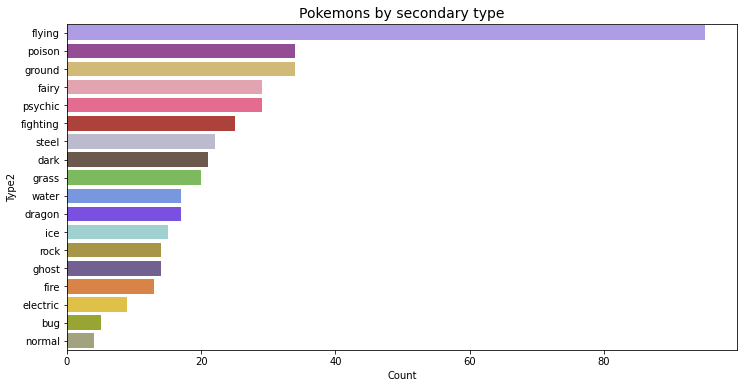

In [29]:
# plottig counts of pokemon by secondary type
plt.figure(figsize=(12,6))
data=df[df['type2']!='None']
order2 = data['type2'].value_counts().index
ax = sns.countplot(y='type2',data=data,order=order2, palette = type_colors)
ax.set_title('Pokemons by secondary type', fontsize = 14)
ax.set(ylabel='Type2',xlabel='Count')

#### The frequency of secondary pokemon types also varies, the most frequent secondary type is *Flying* and the rarest secondary types are *Normal* and *Bug*

In [30]:
# creating data frame to compare frequency of primary and secondary types
type1_value_counts =df['type1'].value_counts().sort_index(level =1)
type2_value_counts = df['type2'].value_counts().drop(labels='None').sort_index(level =1)
types_df = pd.concat([type1_value_counts, type2_value_counts], axis=1).sort_index(level =1)
types_df.columns = ['type1', 'type2']
types_df

type1  type2
bug          72      5
dark         29     21
dragon       27     17
electric     39      9
fairy        18     29
fighting     28     25
fire         52     13
flying        3     95
ghost        27     14
grass        78     20
ground       32     34
ice          23     15
normal      105      4
poison       32     34
psychic      53     29
rock         45     14
steel        24     22
water       114     17

In [31]:
types_df.sort_values(by='type1', inplace =True)

In [32]:
# plotting counts of primary and secondary types
plt.figure(figsize=(12,8))
types_df.plot(kind = 'barh', stacked = True, mark_right = True,figsize=(12,8))

<AxesSubplot: >

<Figure size 864x576 with 0 Axes>

#### Some pokemon types have equal representaion in primary and secondary types (*Poison*, *Ground*, *Dark*, *Fighting*) while others are dispropotionally more frequent in primary or secondary type (*Normal*, *Bug*, *Flying*, *Fairy*)

In [33]:
# creating dataframe to calculate and plot percentage of each type (totalled as both primary and secondary)
types_df2 =types_df
types_df2.reset_index(inplace =True)

In [34]:
types_df2.rename(columns ={'index':'type','type1': 't1_count', 'type2':'t2_count'},inplace=True)

In [35]:
types_df2['total'] =types_df2['t1_count']+types_df2['t2_count']

In [36]:
types_df2['percent'] = round((types_df2['total']*100)/801,2)
types_df2.sort_values(by='percent', ascending = False, inplace=True)
types_df2

type  t1_count  t2_count  total  percent
17     water       114        17    131    16.35
16    normal       105         4    109    13.61
15     grass        78        20     98    12.23
0     flying         3        95     98    12.23
13   psychic        53        29     82    10.24
14       bug        72         5     77     9.61
8     ground        32        34     66     8.24
9     poison        32        34     66     8.24
12      fire        52        13     65     8.11
11      rock        45        14     59     7.37
6   fighting        28        25     53     6.62
7       dark        29        21     50     6.24
10  electric        39         9     48     5.99
1      fairy        18        29     47     5.87
3      steel        24        22     46     5.74
5     dragon        27        17     44     5.49
4      ghost        27        14     41     5.12
2        ice        23        15     38     4.74

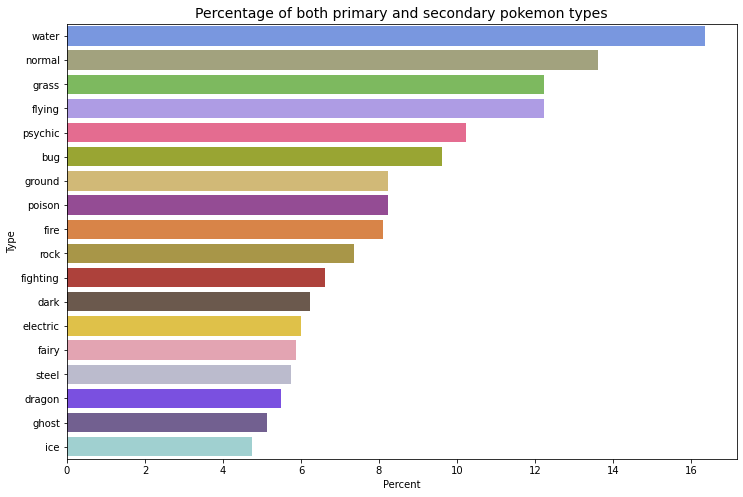

In [37]:
# plotting percentage of both primary and secondary pokemon types
plt.figure(figsize=(12,8))
ax =sns.barplot(data = types_df2, x = 'percent', y ='type',palette = type_colors)
ax.set_title('Percentage of both primary and secondary pokemon types', fontsize = 14)
ax.set(ylabel='Type',xlabel='Percent');

#### Most frequent types are *Water*, *Normal*, *Grass* and *Flying*. The least frequent types are *Ice*, *Ghost* and *Dragon*.

In [118]:
# looking at most and least common type combinations
df_types_count =pd.DataFrame(df['type'].value_counts())
df_types_count['percent']=round((df_types_count['count']*100)/801,2)
df_types_count.head(25)


count  percent
type                         
normal            61     7.62
water             61     7.62
grass             37     4.62
psychic           35     4.37
fire              27     3.37
normal flying     26     3.25
electric          26     3.25
fighting          22     2.75
bug               18     2.25
fairy             16     2.00
grass poison      14     1.75
bug flying        13     1.62
poison            13     1.62
dragon            12     1.50
ice               12     1.50
rock              11     1.37
bug poison        11     1.37
ground            10     1.25
ghost              9     1.12
water ground       9     1.12
dark               9     1.12
water flying       7     0.87
grass flying       6     0.75
psychic fairy      6     0.75
rock water         6     0.75

#### It seems that frequency distribution of type combinations is very right skewed with few pokemon types constituting the majority of occurences and the rest of type combinations ocurring very scarcely.The most frequently occuring pokemon are of single type, and just 5 types such as *Normal*, *Water*, *Grass* and *Psychic* and *Fire* constitutes nearly 30% of all pokemon. The most common combinations of types are *Normal-Flying* (3,25%), *Grass-Poison* (1,75%) and *Bug-Flying* (1,62%). On the other hand as much as 46 type combinations occur only once (0.12%) and constitute as little as 5,52% of all pokemon.

In [130]:
df_types_count.tail(47)

count  percent
type                             
ice flying             2     0.25
fighting flying        1     0.12
steel ground           1     0.12
poison dragon          1     0.12
fire rock              1     0.12
normal water           1     0.12
ground fire            1     0.12
fire water             1     0.12
grass ghost            1     0.12
fire dark              1     0.12
fighting ice           1     0.12
fire dragon            1     0.12
ghost fairy            1     0.12
normal dragon          1     0.12
electric electric      1     0.12
psychic steel          1     0.12
fighting dark          1     0.12
dragon electric        1     0.12
normal ground          1     0.12
ground steel           1     0.12
water steel            1     0.12
fighting steel         1     0.12
poison bug             1     0.12
grass ground           1     0.12
psychic fighting       1     0.12
ice ghost              1     0.12
electric ghost         1     0.12
steel dragon           1     0.12
fire steel             1     0.12
ghost dragon           1     0.12
grass grass            1     0.12
psychic fire           1     0.12
fire fire              1     0.12
fire psychic           1     0.12
dark ghost             1     0.12
bug ghost              1     0.12
ground electric        1     0.12
bug ground             1     0.12
psychic grass          1     0.12
rock dark              1     0.12
steel fighting         1     0.12
rock fighting          1     0.12
flying                 1     0.12
dragon fire            1     0.12
ghost dark             1     0.12
dragon ice             1     0.12
rock poison            1     0.12

## 3) Combat statistics and other relevant feature distributions

#### Looking at the combat statistics distribution it is interesting to includ the distinction between legendary and non legendary pokemon, since legendary pokemon (that constitute 9,44% of all pokemon) are usually the strongest with best combat statistics. 

In [39]:
round(df_type['is_legendary'].value_counts(normalize=True)*100,2)

is_legendary
0    90.56
1     9.44
Name: proportion, dtype: float64

In [40]:
# plotting combat statistics and other features frequency distributions
columns = ["attack", "defense", "sp_attack", "sp_defense", 'speed', 'base_total', 'capture_rate', 'hp']

plt.figure(figsize=(20,16))
for i in range(8):
    plt.subplot(4,2,i+1)
    sns.histplot(data = df_type, x=columns[i], hue ='is_legendary', kde=True, bins = 25, stat = 'percent')
plt.show()


#### Most of combat statistics have continous, bell- resembling but right skewed distributions, with exception of "base_total" which seems to be bimodal, and "capture_rate" which has non continous but sequentaial values of capture rate. 

In [41]:
columns = ['weight_kg','height_m']

plt.figure(figsize=(10,6))
for i in range(2):
    plt.subplot(2,1,i+1)
    sns.histplot(data = df_type, x=columns[i], hue ='is_legendary', kde=True, bins = 30, stat='percent')
    #plt.xscale('log')
plt.show()

#### Weight and height are heavily right skewed with few extreme values on the right

## 4) Feature distribution by type
### Which types are the best at certain combat statistics?

In [42]:
# plotting boxplots of combat statistics and other features by type with distiction on legendary and non legendary pokemon
columns = ["attack", "defense", "sp_attack", "sp_defense", 'base_total','speed', 'capture_rate','hp']

plt.figure(figsize=(20,50))
for i in range(len(columns)):
    plt.subplot(int(len(columns)/2),2,i+1)
    sns.boxplot(data = df_type, y=df_type["type1"].sort_values(), x=columns[i], hue ='is_legendary')
    plt.ylabel(columns[i],fontsize=16)
    plt.xlabel('Type',fontsize=16)
    plt.xticks(fontsize =12)
    plt.yticks(fontsize =14)
plt.show()

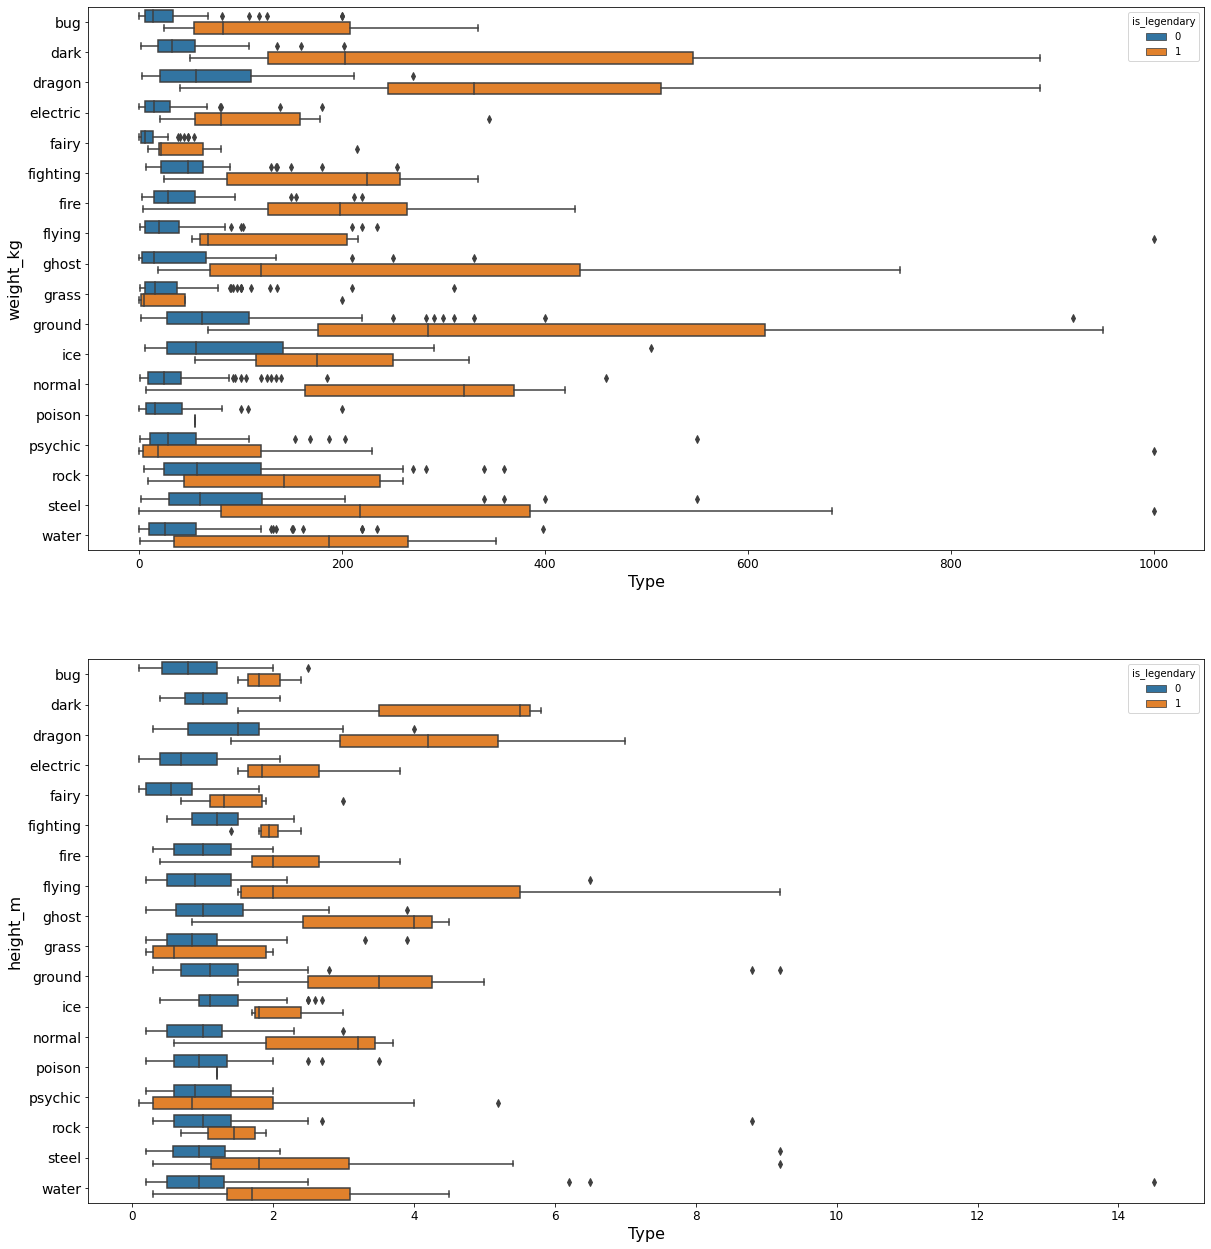

In [43]:
columns = ['weight_kg','height_m']

plt.figure(figsize=(20,22))
for i in range(2):
    plt.subplot(2,1,i+1)
    sns.boxplot(data = df_type, y=df_type["type1"].sort_values(), x=columns[i], hue ='is_legendary')
    #plt.xscale('log')
    plt.ylabel(columns[i],fontsize=16)
    plt.xlabel('Type',fontsize=16)
    plt.xticks(fontsize =12)
    plt.yticks(fontsize =14)
plt.show()

#### For most types legendary pokemon have significantly higher values of combat statistics, lower values of capture rate and bigger size (weight and hight), so while looking at best types at certain combat statistics it is important to discern between legendary and non-legendary pokemon

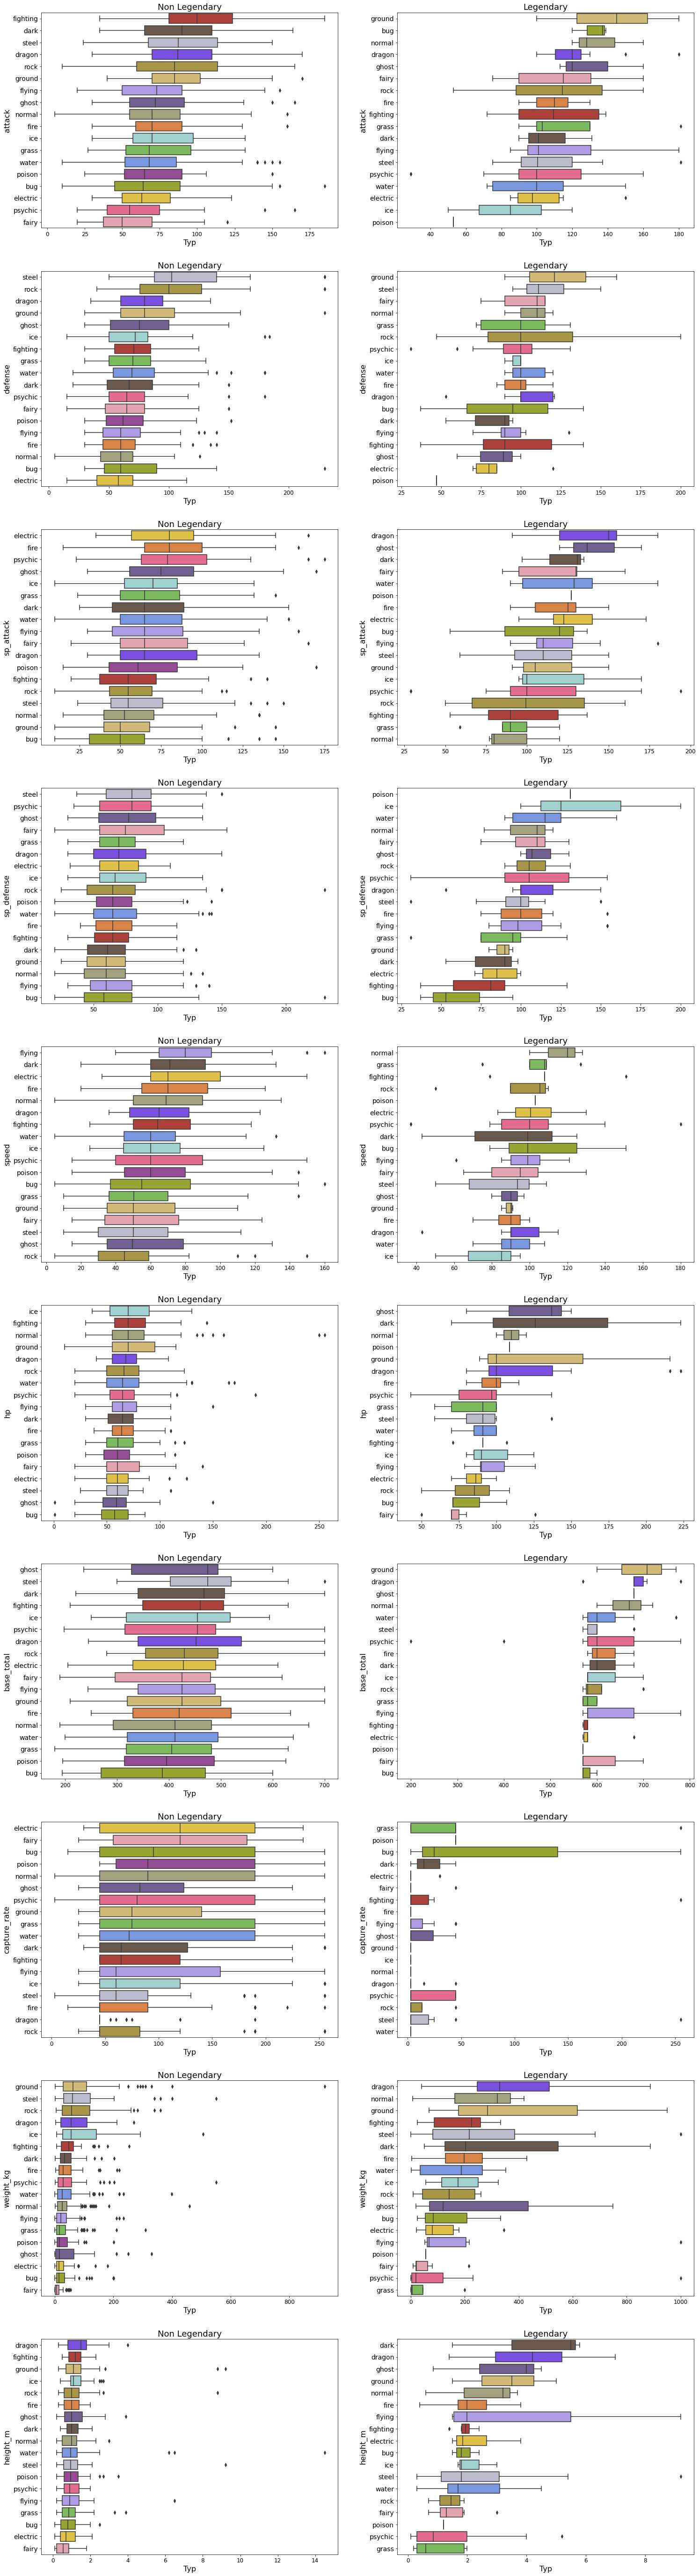

In [44]:
# plotting boxplots of combat statistics and other features by type sorted from highest to lowest and separately for legendary and non legendary pokemon
columns = ["attack", "defense", "sp_attack", "sp_defense", 'speed', 'hp','base_total', 'capture_rate','weight_kg','height_m']
odds =[1,3,5,7,9,11,13,15,17,19]
evens =[2,4,6,8,10,12,14,16,18,20]
plt.figure(figsize=(25,100))

non_legendary_type =df_type[df_type['is_legendary'] == 0]
legendary_type =df_type[df_type['is_legendary'] == 1]

for i in range(10):
    df1 =non_legendary_type.loc[:,['type1', columns[i]]]
    df2 =legendary_type.loc[:,['type1', columns[i]]] 
    order1 = df1.groupby(['type1']).median().sort_values(by=columns[i], ascending= False)
    order2 = df2.groupby(['type1']).median().sort_values(by=columns[i], ascending= False)
    plt.subplot(10,2,odds[i])
    sns.boxplot(data = df1, y= 'type1', x=columns[i], palette = type_colors, order=order1.index)
    #plt.xticks(rotation = 90)
    plt.ylabel(columns[i],fontsize=16)
    plt.xlabel('Typ',fontsize=16)
    plt.title('Non Legendary', fontsize =18)
    plt.xticks(fontsize =12)
    plt.yticks(fontsize =14)
    plt.subplot(10,2,evens[i])
    sns.boxplot(data = df2, y= 'type1', x=columns[i], palette = type_colors, order=order2.index)
    #plt.xticks(rotation = 90)
    plt.ylabel(columns[i], fontsize=16)
    plt.xlabel('Typ',fontsize=16)
    plt.title('Legendary', fontsize = 18)
    plt.xticks(fontsize =12)
    plt.yticks(fontsize =14)
plt.show()

#### Clearly the variation between types for most of the combat statistics and other features is much higher in legendary than non legendary pokemon, except for **Capture rate** that is extremely low for all legendary pokemons, the only one with strong within type variation is *Bug*.The variation within types is usually much smaller for legendary pokemon, which can be explained by smaller group size (legendary pokemon constitute around 9% of all pokemon). The variation within types for non legendary pokemon is in most cases so high that it cancels out variation between types, especially for the features in which the median for almost all the types is almost equal, like **Height**, **Hit Points**, **Base Total** or **Special Defence**. Also comparing the same combat statistics and features between legendary and non legendary pokemons we can clearly see that the types with highest and lowest values are not the same ones as legendary types in most cases, which means that the pokemon type is generally a weak predictor of certain statistics unless a discrimination for legendary and non legendary pokemons will be included.
#### **Attack**: The strongest non legendary type is *Fighting* and the weakest by amost 50% is *Fairy*. The best legendary types are *Ground*, *Bug* and *Normal*, and almost three times weaker is *Poison*.
#### **Defense**: The strongest non legendary type are *Steel* and *Rock* by around 30% better than the rest. The best legendary types are *Ground*,*Steel*, *Fairy* and *Normal* and again around three times weaker is *Poison*. This is the first feature so far that we see the same type with highest values among legendary and non legendary types (*Steel*).
#### **Special Attack**: The strongest non legendary type are *Electric* , *Fire*, *Psychic* and *Ghost*, and the weakest by around 30% - *Ground* and *Bug*. The best legendary types are *Dragon* and *Ghost* while the weakest by almost 100% are *Normal* and *Grass*.
#### **Special Defense**: There is much higher within than between type variation for non legendary pokemon for this feature, while opposite is true for legendary pokemon.The best at **Special Defense** are *Poison* and *Ice* and the worst (about 2 x weaker) is *Bug*
#### **Speed** (Attack speed): The fastest attackin non legendary type is *Flying* that attacks almost 50% faster that the slowest attacking non legendary type- *Rock*.  at **Special Defense** are *Poison* and *Ice* and the worst (about 2 x weaker) is *Bug*
#### **HP** (Hit Points): There is much higher within than between type variation for non legendary pokemon for this feature and most of median values are within same range, while opposite is true for legendary pokemon. The types with highest **HP** are  *Ghost* and *Dark* and the lowest (about 2 x) is *Fairy*
#### **Base Total**(summary of other combat statistics):  There is much higher within than between type variation for non legendary pokemon for this feature. Most legendary pokemon have similar value of median and only four types stand out with much higher **Base Total** namely *Ground*, *Dragon*, *Ghost* and *Normal*
#### **Capture Rate**(how easy it is to catch the pokemon, higher value translates to easy catch):  Again, for most non legendary types there is much higher within than between type variation, but we can see that *Rock* as the easiest to catch is almost 2 x easier to catch than *Electric* or *Fairy*. Most legendary pokemon are extremely hard to catch with **Capture Rate** close to zero, with one exception of *Bug* type which has very high within type variance for this particular trait.
#### **Weight**:  There are types with higher and lower within type variance, and for most types there are extreme outliers present.The heaviest non legendary pokemon are *Ground*, *Steel*, *Rock*, *Dragon* and *Ice*, and *Fairy* is the lightest type. Among the legendary pokemon the heaviest types are *Dragon*, *Normal* and *Ground*, and the lightest *Grass*, *Psychic* and *Fairy*. This is the second feature so far that we see the same types with highest and lowest values among legendary and non legendary types.
#### **Height**: Again, there is much higher within than between type variation for non legendary pokemon for this feature,while opposite is true for legendary pokemon.The highest legendary pokemon types are *Dark*, *Dragon* and *Ghost* and the shortest (about 5 x shorter) are *Grass* and *Psychic*

## 5) Feature correlations

In [45]:
df2_type= df_type.drop(columns= ['abilities', 'experience_growth', 'generation','is_legendary', 'tot_abilities' ], axis=1)

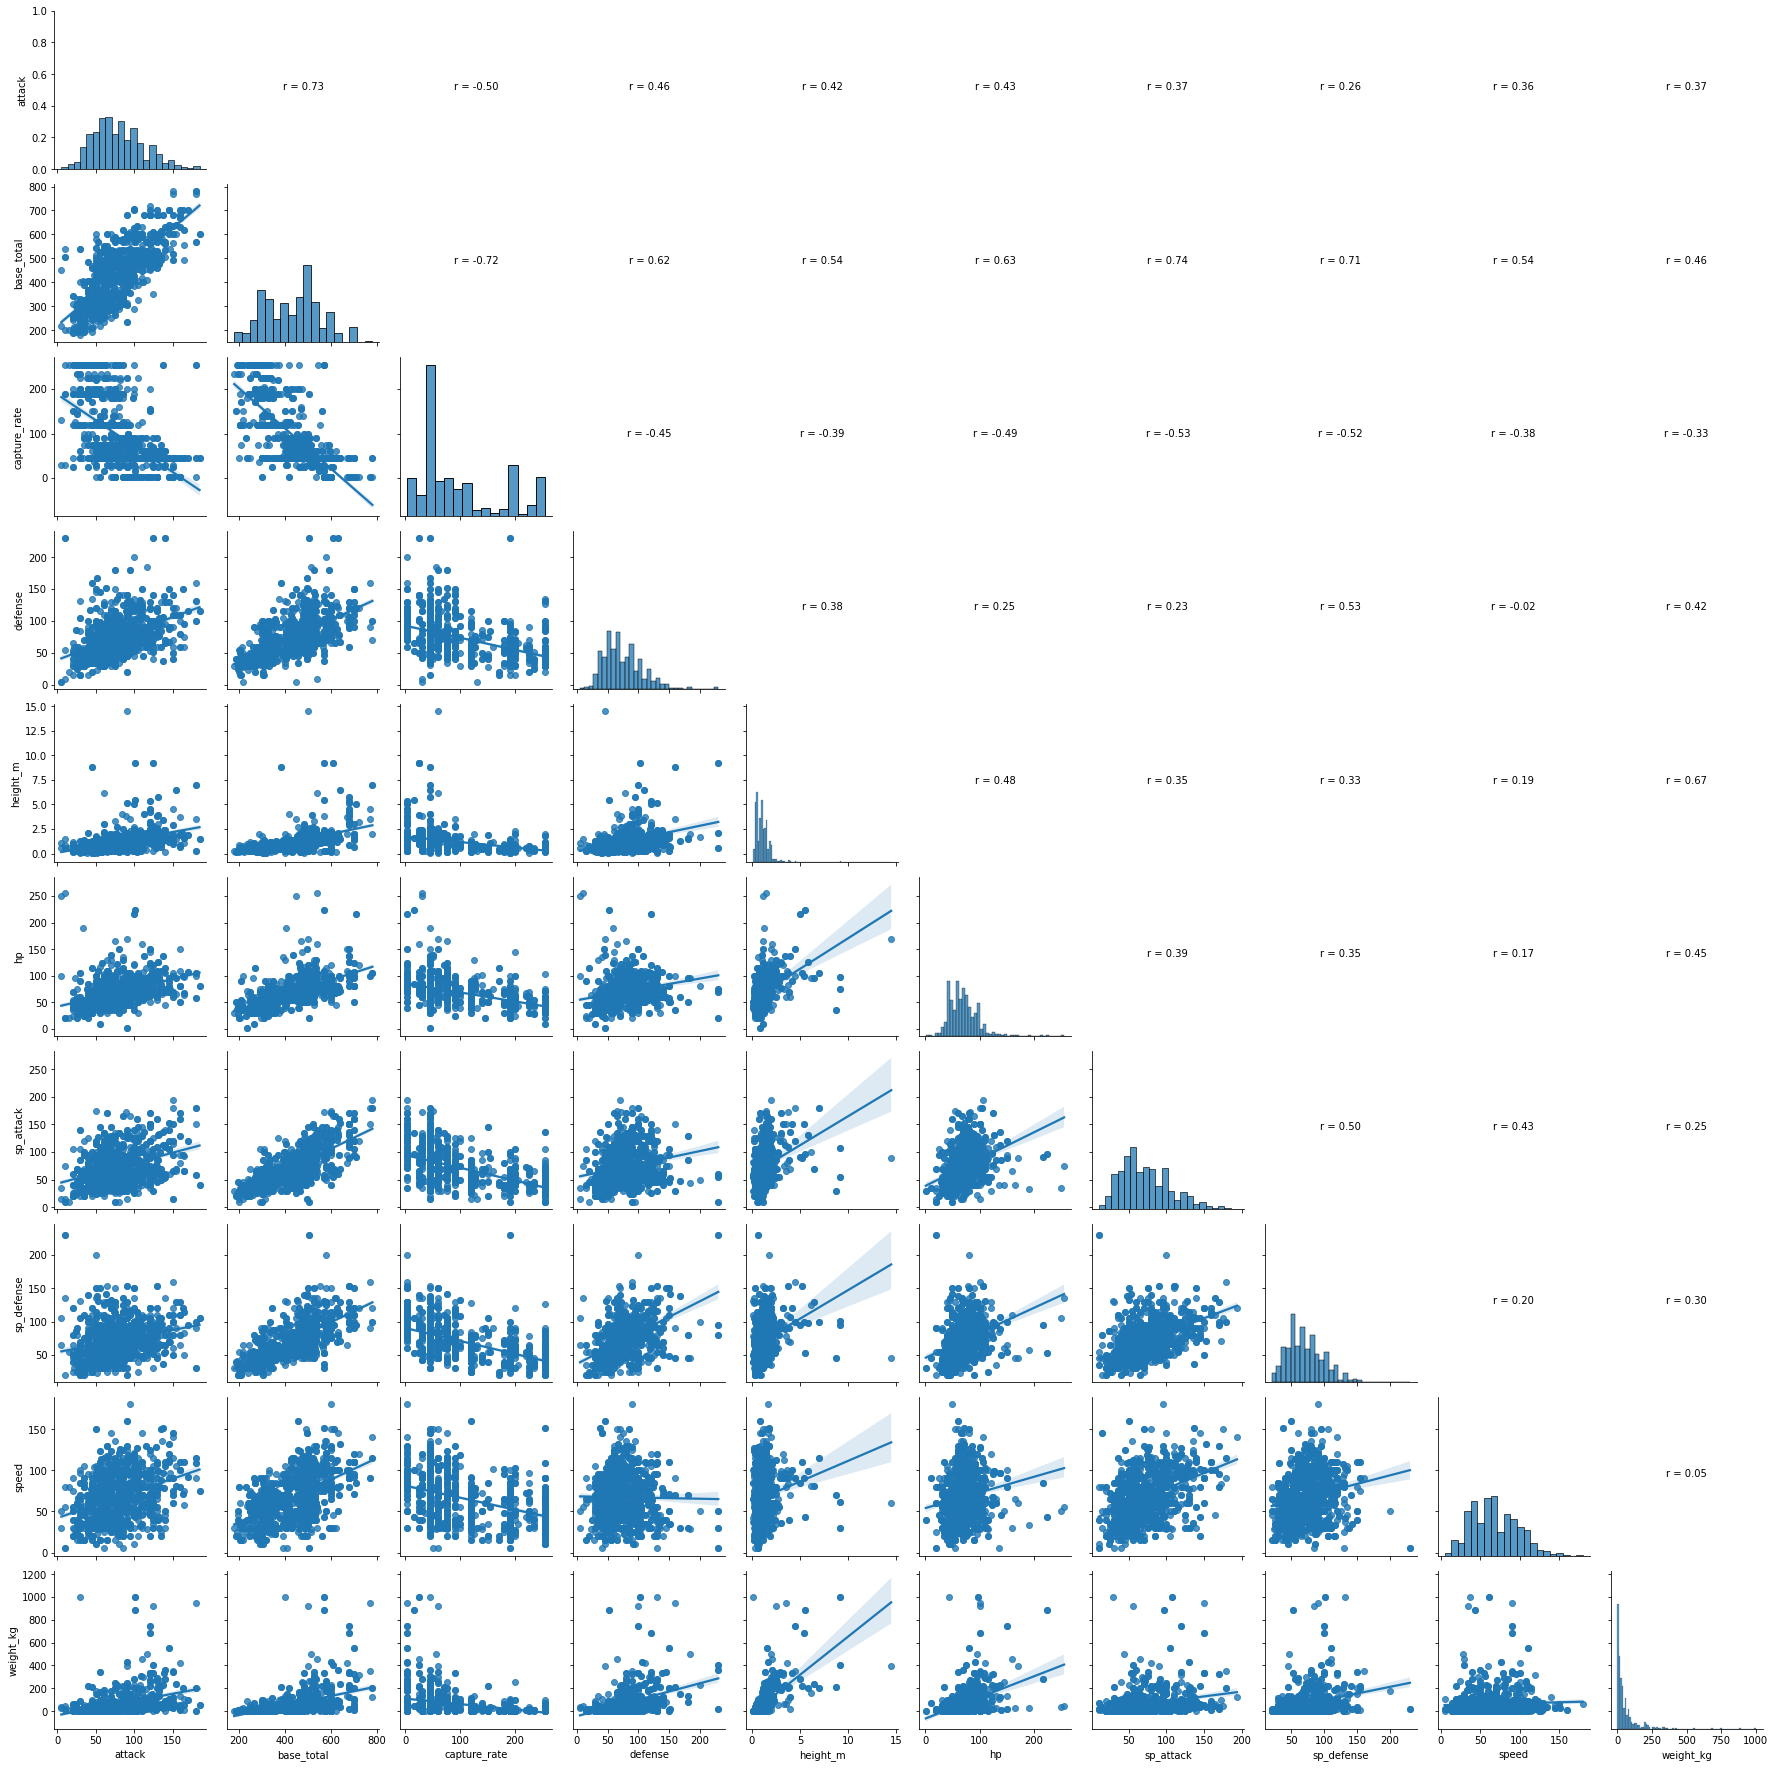

In [46]:
# plotting pairgrid with calculated Pearson coefficient
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()


g = sns.PairGrid(df2_type)
g.map_diag(sns.histplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

In [47]:
# plotting values of features against base total with a distinction on legendary and non legendary pokemon
columns = ["attack", 'capture_rate',
      'defense', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'height_m']

plt.figure(figsize=(30,15))
for i in range(len(columns)):
    plt.subplot(2,int(len(columns)/2),i+1)
    sns.scatterplot(data = df_type, x=columns[i], y='base_total', hue ='is_legendary')
    sns.regplot(data = df_type, x=columns[i], y='base_total', fit_reg = True, scatter=False)
plt.show()

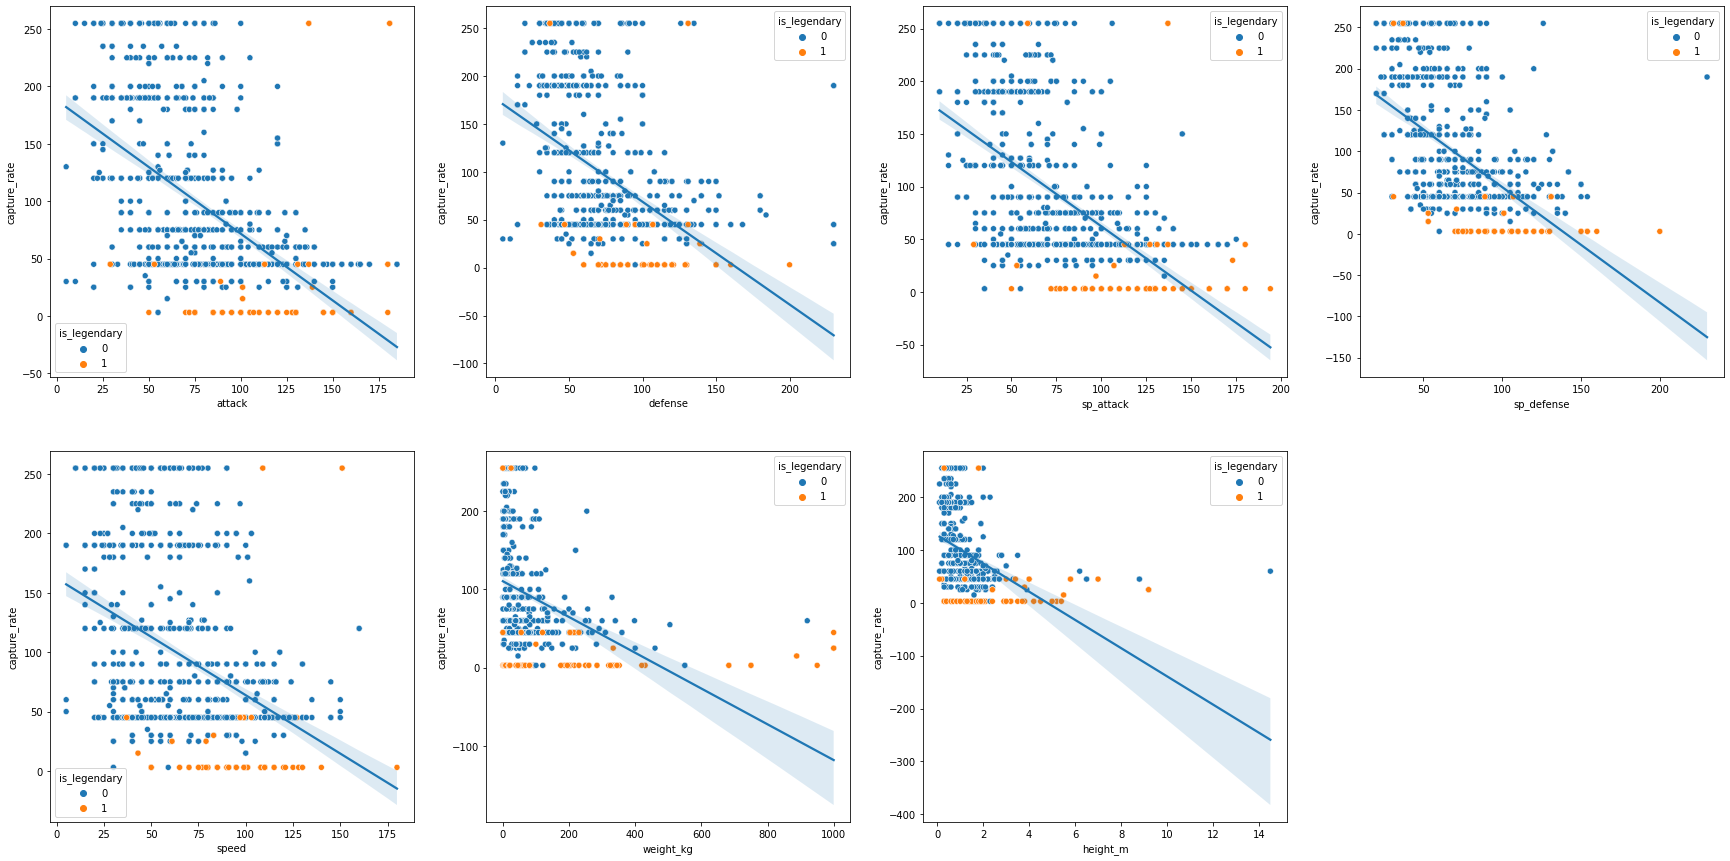

In [48]:
# plotting values of features against capture rate with a distinction on legendary and non legendary pokemon
columns = ["attack", 'defense', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'height_m']

plt.figure(figsize=(30,15))
for i in range(len(columns)):
    plt.subplot(2,4,i+1)
    sns.scatterplot(data = df_type, x=columns[i], y='capture_rate', hue ='is_legendary')
    sns.regplot(data = df_type, x=columns[i], y='capture_rate', fit_reg = True, scatter= False) #.invert_yaxis()
plt.show()

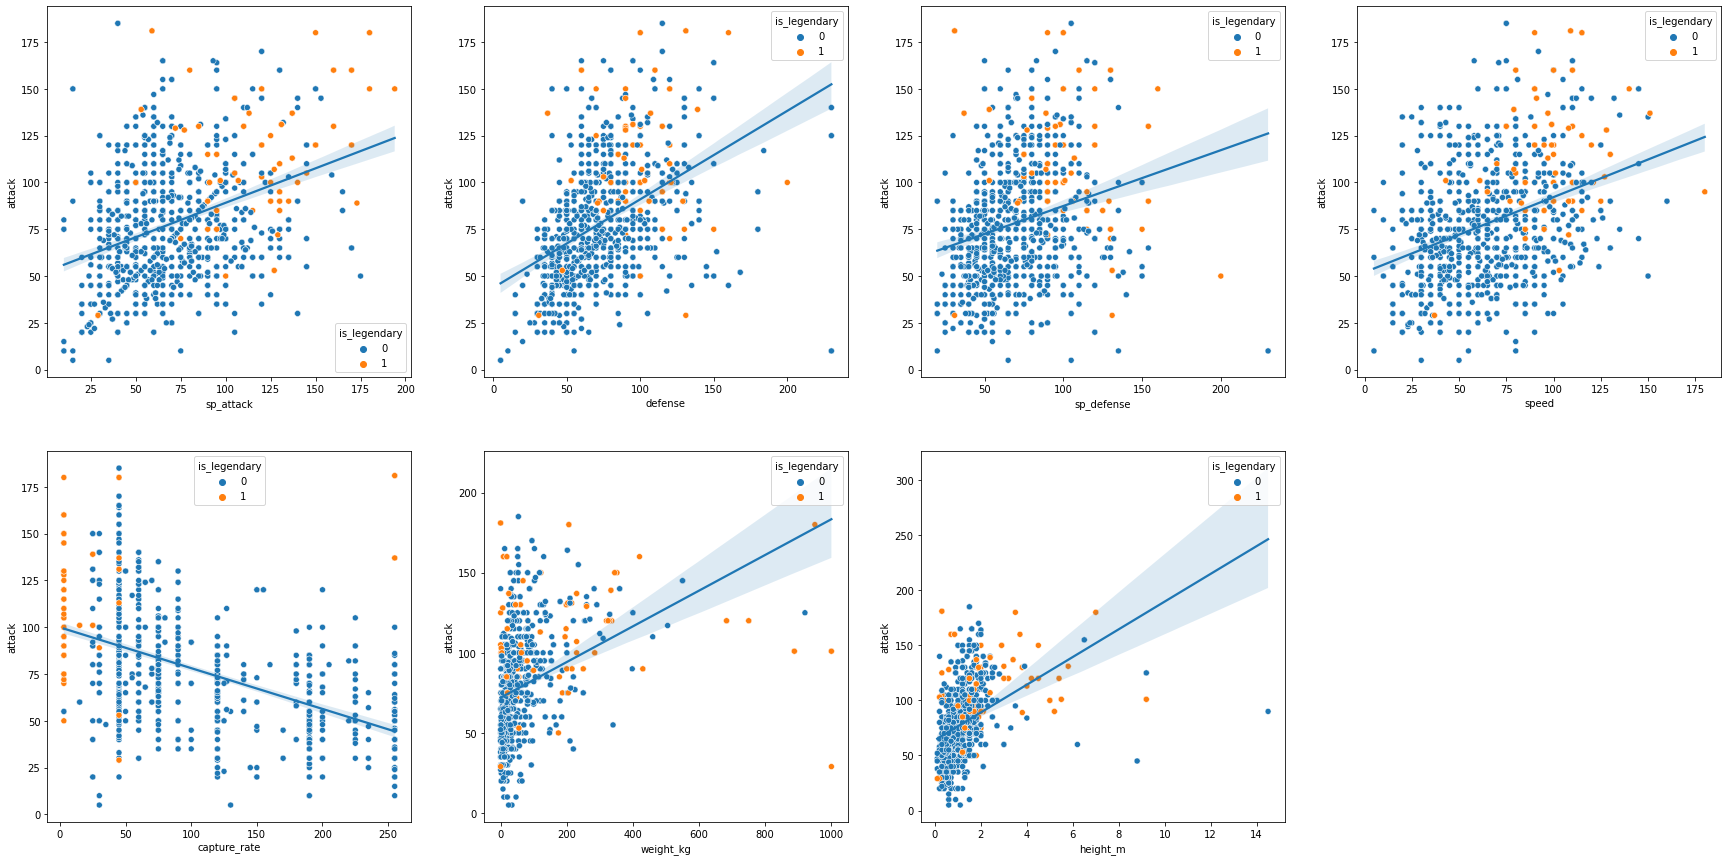

In [50]:
# plotting values of features against attack with a distinction on legendary and non legendary pokemon
columns = [ 'sp_attack',  'defense','sp_defense', 'speed','capture_rate', 'weight_kg', 'height_m' ]

plt.figure(figsize=(30,15))
for i in range(7):
    plt.subplot(2,4,i+1)
    sns.scatterplot(data = df_type, x=columns[i], y="attack", hue ='is_legendary')
    sns.regplot(data = df_type, x=columns[i], y="attack", fit_reg = True, scatter = False)
plt.show()

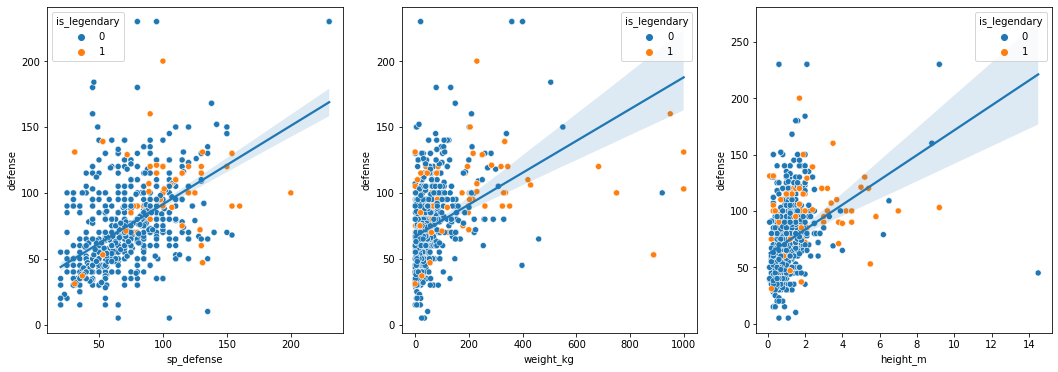

In [51]:
# plotting values of features most strongly correlated to defense with a distinction on legendary and non legendary pokemon
columns = ['sp_defense', 'weight_kg', 'height_m' ]

plt.figure(figsize=(18,6))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.scatterplot(data = df_type, x=columns[i], y='defense', hue ='is_legendary')
    sns.regplot(data = df_type, x=columns[i], y='defense', fit_reg = True, scatter = False)
plt.show()

In [52]:
# plotting correlations between most features and base total with a distinction on legendary and non legendary pokemon
plt.figure(figsize=(10,6))
#sns.regplot(data = df_type, x='height_m', y='weight_kg', fit_reg = True, scatter = False, ci=None)
sns.scatterplot(data = df_type, x='height_m', y='weight_kg', hue ='is_legendary')
plt.xscale('log')
plt.yscale('log')

In [54]:
# preparin dataframe for correlation heatmap
df_corr = df_type[['attack',
        'base_total', 'capture_rate',
      'defense', 'experience_growth', 'height_m', 'hp',
     'sp_attack', 'sp_defense', 'speed', 'weight_kg' ]]

Text(0.5, 1.0, 'Feature correlation')

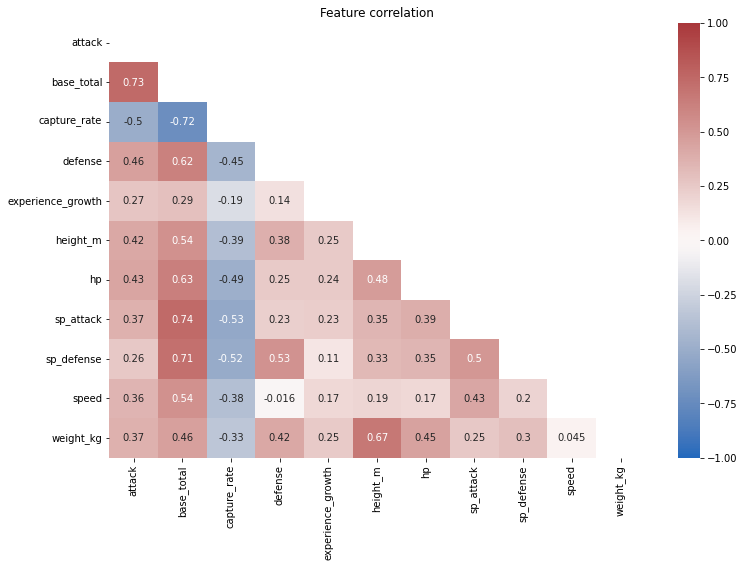

In [55]:
#fig,axes = plt.subplots(figsize=(14,8))
plt.figure(figsize=(12,8))
corr =  df_corr.corr()
matrix2 = np.triu(corr)
sns.heatmap(df_corr.corr(),annot=True, mask=matrix2,vmin =-1, vmax=1, cmap='vlag').set_title('Feature correlation')

#### Ofcourse **Base Total** as a feature calculated as sum of other combat statistics will be strongly to moderately correlated with **Attack**, **Special Attack**, **Defense**, **Special Defense**, **Hit Points** and **Speed**. It is also strongly negatively correlated with **Capture Rate** meaning the higher **Base Total** value the harder the pokemon will be to catch.
#### The remaining combat statistics and features are weakly to mildly correlated, with only exception of quite expected strong correlation between weight and height.

# Further data analysis and visualisation

## 6) Predicting best types at combat statistics

Text(0.5, 1.0, 'Median combat statistic values by type')

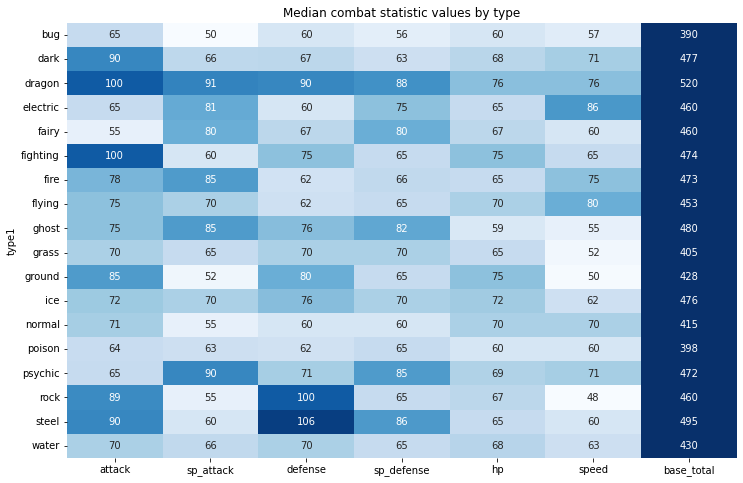

In [56]:
# plotting median combat values for each type (legendary and non legendary pooled together)
plt.figure(figsize=(12,8))

sns.heatmap(df_type.groupby('type1')
            [['attack','sp_attack','defense','sp_defense','hp','speed','base_total']].median()
            ,annot=True,cbar=False,cmap='Blues',fmt='.0f',vmin=50,vmax=110).set_title('Median combat statistic values by type')

#### After calculating median value by type for all pokemon (without discerning by legendary and non legendary pokemon) we can see strongest and weakest types at each combat statistic. *Dragon* and *Ice* seem to have consistently high values of combat statistics, while *Bug* seem to have consistenly low values of combat statistics. Other types seem to have some values of combat statistics much higher that others, for example *Steel* and *Rock* have high values of **Defense** and **Attack** and lower values of remaining statistics, while *Fighting* type has much higher value of **Attack** than remaining statistics

Text(0.5, 1.0, 'Legendary Stats')

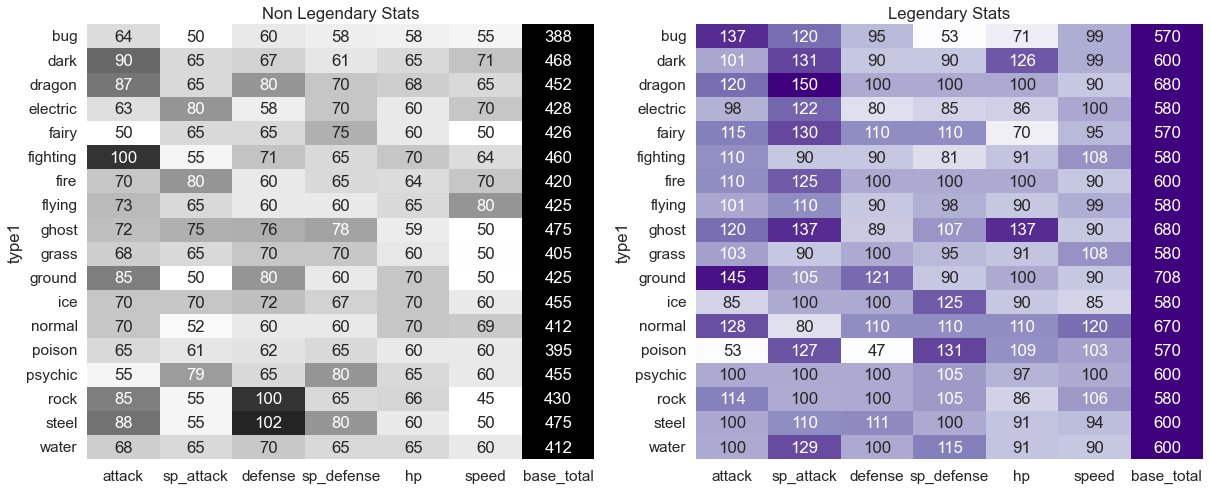

In [138]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.heatmap(df_type[df_type['is_legendary'] == 0].groupby('type1')
            [['attack','sp_attack','defense','sp_defense','hp','speed','base_total']].median()
            ,annot=True,cbar=False,cmap='Greys',fmt='.0f',vmin=50,vmax=110).set_title('Non Legendary Stats')
plt.subplot(1,2,2)
sns.heatmap(df_type[df_type['is_legendary'] == 1].groupby('type1')
            [['attack','sp_attack','defense','sp_defense','hp','speed','base_total']].median()
            ,annot=True,cbar=False,cmap='Purples',fmt='.0f',vmin=60,vmax=150).set_title('Legendary Stats')

#### When discerning by legendary and non legendary pokemon the picture changes.Non legendary *Dragon* has high **Attack** and **Defence** while legendary *Dragon* has highest **Special Attack**. Non legendary *Bug* seem to have consistenly low values of combat statistics, while legendary *Bug* has very high **Attack**. Non legendary *Fighting* type has much higher value of **Attack** than remaining statistics, while legendary *Fighting* type has more balanced values of combat statistics, and there are two types with much higher **Attack** than remaining statistics - *Ground* and *Normal*.


## 7) Predicting best type combinations for least damage during combat

#### Creating a multiplier chart of multipliers against given type attack for all types 

In [57]:
types=['Normal', 'Fire', 'Water', 'Grass', 'Electric', 'Ice', 'Fighting',
       'Poison', 'Ground', 'Flying', 'Psychic', 'Bug',
       'Rock', 'Ghost', 'Dragon', 'Dark', 'Steel', 'Fairy']
multipliers = pd.DataFrame([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.5, 0, 1, 1, 0.5, 1],
                           [1, 0.5, 0.5, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0.5, 1, 0.5, 1, 2, 1],
                           [1, 2, 0.5, 0.5, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0.5, 1, 1, 1],
                           [1, 0.5, 2, 0.5, 1, 1, 1, 0.5, 2, 0.5, 1, 0.5, 2, 1, 0.5, 1, 0.5, 1],
                           [1, 1, 2, 0.5, 0.5, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0.5, 1, 1, 1],
                           [1, 0.5, 0.5, 2, 1, 0.5, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0.5, 1],
                           [2, 1, 1, 1, 1, 2, 1, 0.5, 1, 0.5, 0.5, 0.5, 2, 0, 1, 2, 2, 0.5],
                           [1, 1, 1, 2, 1, 1, 1, 0.5, 0.5, 1, 1, 1, 0.5, 0.5, 1, 1, 0, 2],
                           [1, 2, 1, 0.5, 2, 1, 1, 2, 1, 0, 1, 0.5, 2, 1, 1, 1, 2, 1],
                           [1, 1, 1, 2, 0.5, 1, 2, 1, 1, 1, 1, 2, 0.5, 1, 1, 1, 0.5, 1],
                           [1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0.5, 1, 1, 1, 1, 0, 0.5, 1],
                           [1, 0.5, 1, 2, 1, 1, 0.5, 0.5, 1, 0.5, 2, 1, 1, 0.5, 1, 2, 0.5, 0.5],
                           [1, 2, 1, 1, 1, 2, 0.5, 1, 0.5, 2, 1, 2, 1, 1, 1, 1, 0.5, 1],
                           [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0.5, 1, 1],
                           [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0.5, 0],
                           [1, 1, 1, 1, 1, 1, 0.5, 1, 1, 1, 2, 1, 1, 2, 1, 0.5, 1, 0.5],
                           [1, 0.5, 0.5, 1, 0.5, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0.5, 2], 
                           [1, 0.5, 1, 1, 1, 1, 2, 0.5, 1, 1, 1, 1, 1, 1, 2, 2, 0.5, 1]],
                           columns = types, index = types)

In [58]:
multipliers.sort_index(axis=1, inplace = True)
plt.figure(figsize=(10,8))
graph1 = sns.heatmap(multipliers, cmap = "vlag",vmin=0, vmax=2, robust = True)
graph1.set_title("Multiplier chart", fontsize = 14)
plt.xlabel('Attacked type', fontsize = 12)
plt.ylabel('Attack type', fontsize = 12)

Text(69.0, 0.5, 'Attack type')

#### to be continued

### Normalising dataframe

In [59]:
# adjusting dataframe to normalisation by selecting relevant columns
df_normalized = df_type.drop(columns= ['abilities', 'experience_growth', 'generation', 'tot_abilities' ], axis=1)
df_normalized = df_normalized.set_index(['name', 'type1', 'is_legendary'])

In [60]:
# normalisisng
df_normalized=round(((df_normalized-df_normalized.min())/(df_normalized.max()-df_normalized.min())*100),0)

In [61]:
df_normalized

attack  base_total  capture_rate  defense   
name      type1   is_legendary                                              
Bulbasaur poison  0               24.0        23.0          17.0     20.0  \
          grass   0               24.0        23.0          17.0     20.0   
Ivysaur   poison  0               32.0        38.0          17.0     26.0   
          grass   0               32.0        38.0          17.0     26.0   
Venusaur  poison  0               53.0        74.0          17.0     52.0   
...                                ...         ...           ...      ...   
Guzzlord  dragon  1               53.0        65.0           5.0     21.0   
          dark    1               53.0        65.0           5.0     21.0   
Necrozma  psychic 1               57.0        70.0           0.0     43.0   
Magearna  fairy   1               50.0        70.0           0.0     49.0   
          steel   1               50.0        70.0           0.0     49.0   

                                height_m    hp  sp_attack  sp_defense  speed   
name      type1   is_legendary                                                 
Bulbasaur poison  0                  4.0  17.0       30.0        21.0   23.0  \
          grass   0                  4.0  17.0       30.0        21.0   23.0   
Ivysaur   poison  0                  6.0  23.0       38.0        29.0   31.0   
          grass   0                  6.0  23.0       38.0        29.0   31.0   
Venusaur  poison  0                 13.0  31.0       61.0        48.0   43.0   
...                                  ...   ...        ...         ...    ...   
Guzzlord  dragon  1                 38.0  87.0       47.0        16.0   22.0   
          dark    1                 38.0  87.0       47.0        16.0   22.0   
Necrozma  psychic 1                 16.0  38.0       64.0        33.0   42.0   
Magearna  fairy   1                  6.0  31.0       65.0        45.0   34.0   
          steel   1                  6.0  31.0       65.0        45.0   34.0   

                                weight_kg  
name      type1   is_legendary             
Bulbasaur poison  0                   1.0  
          grass   0                   1.0  
Ivysaur   poison  0                   1.0  
          grass   0                   1.0  
Venusaur  poison  0                  10.0  
...                                   ...  
Guzzlord  dragon  1                  89.0  
          dark    1                  89.0  
Necrozma  psychic 1                  23.0  
Magearna  fairy   1                   8.0  
          steel   1                   8.0  

[1218 rows x 10 columns]

## 8) How do pokemon types cluster together?

In [62]:
# plotting clusterplot for types by median values of features
sns.set(font_scale=1.4)
sns.clustermap(df_normalized.groupby('type1')
            [['attack','sp_attack','defense','sp_defense','hp','speed','weight_kg', 'capture_rate']].median()
            ,annot=True,cmap="mako_r",vmin=0,vmax=60, annot_kws={"size": 14})
#plt.xticks(fontsize =16)
#plt.yticks(fontsize = 16)
#plt.xlabel("Atrybuty", fontsize =16)
#plt.ylabel("Typy", fontsize = 16)
plt.show();

#### Pokemon types are clustered in 3 groups:
-  First group consisting of *Steel*, *Rock*, *Fighting*, *Dark* and *Dragon* with higher **Weight**, strong **Attack** and **Defense** and low **Capture Rate**
-  Second group consisting of *Flying*, *Fire*, *Electric*, *Psychic*, *Ghost* and *Fairy* with low **Weight**, strong **Special Attack** and **Special Defense**
-  Third group consisting of *Water*, *Ice*, *Grass*, *Ground*, *Poison*, *Bug* and *Normal*   with high **Capture Rate** and low **Defense**

## 9) Are balanced or specialized strategies more popular among pokemon?

#### By balanced we mean more or less equal distribution of combat statistics values, and specialized would mean disproportionate distribution of combat statistics values. 

In [63]:
# preparing dataframe so it has only 6 combat statistics to calculate their distribution for each pokemon
df_spider =df_normalized.drop(columns =['base_total', 'capture_rate', 'height_m', 'weight_kg'], axis= 1)

In [64]:
# finding minimal and maximal value of each row and calculating the difference between them
df_spider['max']=df_spider.max(axis=1)
df_spider['min']=df_spider.min(axis=1)
df_spider['diff']=df_spider['max']-df_spider['min']

In [65]:
df_spider

attack  defense    hp  sp_attack  sp_defense   
name      type1   is_legendary                                                 
Bulbasaur poison  0               24.0     20.0  17.0       30.0        21.0  \
          grass   0               24.0     20.0  17.0       30.0        21.0   
Ivysaur   poison  0               32.0     26.0  23.0       38.0        29.0   
          grass   0               32.0     26.0  23.0       38.0        29.0   
Venusaur  poison  0               53.0     52.0  31.0       61.0        48.0   
...                                ...      ...   ...        ...         ...   
Guzzlord  dragon  1               53.0     21.0  87.0       47.0        16.0   
          dark    1               53.0     21.0  87.0       47.0        16.0   
Necrozma  psychic 1               57.0     43.0  38.0       64.0        33.0   
Magearna  fairy   1               50.0     49.0  31.0       65.0        45.0   
          steel   1               50.0     49.0  31.0       65.0        45.0   

                                speed   max   min  diff  
name      type1   is_legendary                           
Bulbasaur poison  0              23.0  30.0  17.0  13.0  
          grass   0              23.0  30.0  17.0  13.0  
Ivysaur   poison  0              31.0  38.0  23.0  15.0  
          grass   0              31.0  38.0  23.0  15.0  
Venusaur  poison  0              43.0  61.0  31.0  30.0  
...                               ...   ...   ...   ...  
Guzzlord  dragon  1              22.0  87.0  16.0  71.0  
          dark    1              22.0  87.0  16.0  71.0  
Necrozma  psychic 1              42.0  64.0  33.0  31.0  
Magearna  fairy   1              34.0  65.0  31.0  34.0  
          steel   1              34.0  65.0  31.0  34.0  

[1218 rows x 9 columns]

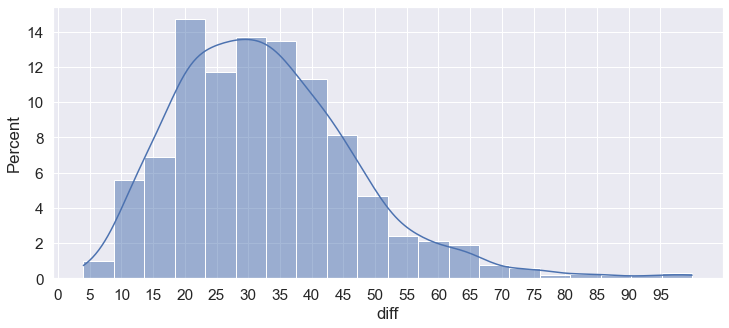

In [66]:
# plotting the frequency distribution of differences
plt.figure(figsize=(12,5))
sns.histplot(data= df_spider['diff'], bins = 20, kde= True, stat ='percent')
plt.xticks((np.arange(0, 100, step=5)))
plt.show();

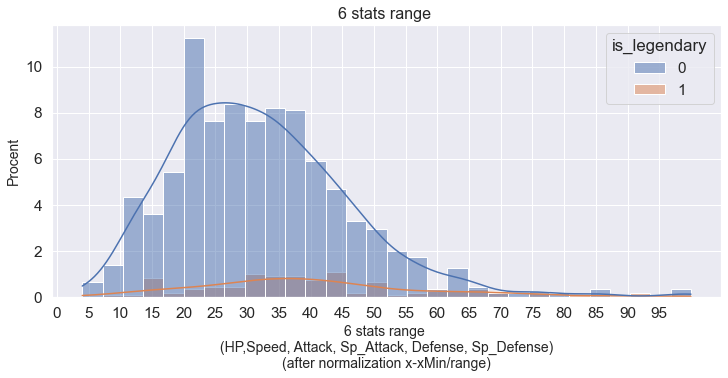

In [67]:
# plotting the frequency distribution distribution of differences for non legendary and legendary pokemon
plt.figure(figsize=(12,5))
sns.histplot(data =df_spider, x =df_spider['diff'], hue ='is_legendary' , kde=True, bins = 30, stat = 'percent')
plt.ylabel('Procent', fontsize = 14)
plt.xlabel("6 stats range \n (HP,Speed, Attack, Sp_Attack, Defense, Sp_Defense) \n(after normalization x-xMin/range)", fontsize = 14)
plt.title("6 stats range ", fontsize = 16)
plt.xticks((np.arange(0, 100, step=5)))
plt.show();

In [68]:
# function that will assign strategy based on difference value
# thresholds assigned based on frequency distribution
def assign_strategy(row):
    if row['diff'] <15:
        val = 'strongly balanced'
    elif row['diff'] <25:
        val = 'balanced'
    elif row['diff'] <45:
        val = 'mixed'
    elif row['diff'] <65:
        val = 'specialist'
    else:
        val = 'extreme specialist'
    return val

In [69]:
df_strategy = df_spider.reset_index()

In [70]:
df_strategy.set_index(['name', 'type1'])

is_legendary  attack  defense    hp  sp_attack  sp_defense   
name      type1                                                                 
Bulbasaur poison              0    24.0     20.0  17.0       30.0        21.0  \
          grass               0    24.0     20.0  17.0       30.0        21.0   
Ivysaur   poison              0    32.0     26.0  23.0       38.0        29.0   
          grass               0    32.0     26.0  23.0       38.0        29.0   
Venusaur  poison              0    53.0     52.0  31.0       61.0        48.0   
...                         ...     ...      ...   ...        ...         ...   
Guzzlord  dragon              1    53.0     21.0  87.0       47.0        16.0   
          dark                1    53.0     21.0  87.0       47.0        16.0   
Necrozma  psychic             1    57.0     43.0  38.0       64.0        33.0   
Magearna  fairy               1    50.0     49.0  31.0       65.0        45.0   
          steel               1    50.0     49.0  31.0       65.0        45.0   

                   speed   max   min  diff  
name      type1                             
Bulbasaur poison    23.0  30.0  17.0  13.0  
          grass     23.0  30.0  17.0  13.0  
Ivysaur   poison    31.0  38.0  23.0  15.0  
          grass     31.0  38.0  23.0  15.0  
Venusaur  poison    43.0  61.0  31.0  30.0  
...                  ...   ...   ...   ...  
Guzzlord  dragon    22.0  87.0  16.0  71.0  
          dark      22.0  87.0  16.0  71.0  
Necrozma  psychic   42.0  64.0  33.0  31.0  
Magearna  fairy     34.0  65.0  31.0  34.0  
          steel     34.0  65.0  31.0  34.0  

[1218 rows x 10 columns]

In [71]:
df_strategy['strategy'] = df_strategy.apply(assign_strategy, axis=1)

<AxesSubplot: xlabel='strategy', ylabel='count'>

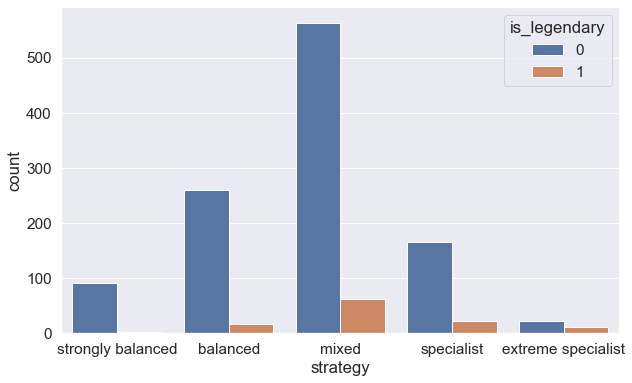

In [72]:
# plotting countplot of strategies for non legendary and legendary pokemon
plt.figure(figsize=(10,6))
sns.countplot(data=df_strategy, x ='strategy', hue='is_legendary')

In [73]:
# calculating percent of each strategy per non legendary and legendary pokemon
strategy_percent =df_strategy.groupby(['is_legendary'])['strategy'].value_counts(normalize = True)
strategy_percent 

is_legendary  strategy          
0             mixed                 0.511333
              balanced              0.235721
              specialist            0.150499
              strongly balanced     0.082502
              extreme specialist    0.019946
1             mixed                 0.539130
              specialist            0.200000
              balanced              0.139130
              extreme specialist    0.104348
              strongly balanced     0.017391
Name: proportion, dtype: float64

In [74]:
strategy_percent = pd.DataFrame(strategy_percent)
strategy_percent.reset_index(inplace=True)

In [75]:
strategy_percent['percent'] = round(strategy_percent['proportion'],2 )*100

In [76]:
list_ordering = ["strongly balanced","balanced", "mixed","specialist", "extreme specialist"]  

In [77]:
strategy_percent

is_legendary            strategy  proportion  percent
0             0               mixed    0.511333     51.0
1             0            balanced    0.235721     24.0
2             0          specialist    0.150499     15.0
3             0   strongly balanced    0.082502      8.0
4             0  extreme specialist    0.019946      2.0
5             1               mixed    0.539130     54.0
6             1          specialist    0.200000     20.0
7             1            balanced    0.139130     14.0
8             1  extreme specialist    0.104348     10.0
9             1   strongly balanced    0.017391      2.0

In [78]:
# plotting barplot of of strategies for non legendary and legendary pokemon
plt.figure(figsize=(10,6))
sns.barplot(data=strategy_percent, x ='strategy', y = 'percent', hue='is_legendary', order = list_ordering)

<AxesSubplot: xlabel='strategy', ylabel='percent'>

#### It seems that there is a slight shift towards **generally balanced strategy** in *non legendary pokemon* (32% in total of 8% strongly balanced and 24% balanced) compared to *legendary pokemon* (16% balanced in total of 2% strongly balanced and 14% balanced). It also seems that there is a slight shift towards **generally specialist strategy** in *legendary pokemon* (30% in total of 20% specialist and 10% of extreme specialist) compared to *non legendary pokemon* (17% in total of 15 % specialist and 2% of extreme specialist). This might be due to generally higher combat statistic values in legendary pokemon- maybe with high combat statistics one can afford to be highly specialized?

In [79]:
# preparing dataframe to plot stacked barplot of percentage of each strategy in each type
df_strategy_bytype =df_strategy.groupby('type1')['strategy'].value_counts()
df_strategy_bytype=pd.DataFrame(df_strategy_bytype)
df_strategy_bytype =df_strategy_bytype.reset_index()

In [80]:
df_sums = df_strategy_bytype.groupby('type1')['count'].sum()
df_sums = pd.DataFrame(df_sums)
df_sums =df_sums.reset_index()
df_sums.rename(columns={'count':'sum'}, inplace=True)

In [81]:
df_str2 =df_strategy_bytype.merge(df_sums, how= 'left', on='type1')
df_str2['percent_strategy']= round((df_str2['count']*100)/df_str2['sum'],2)

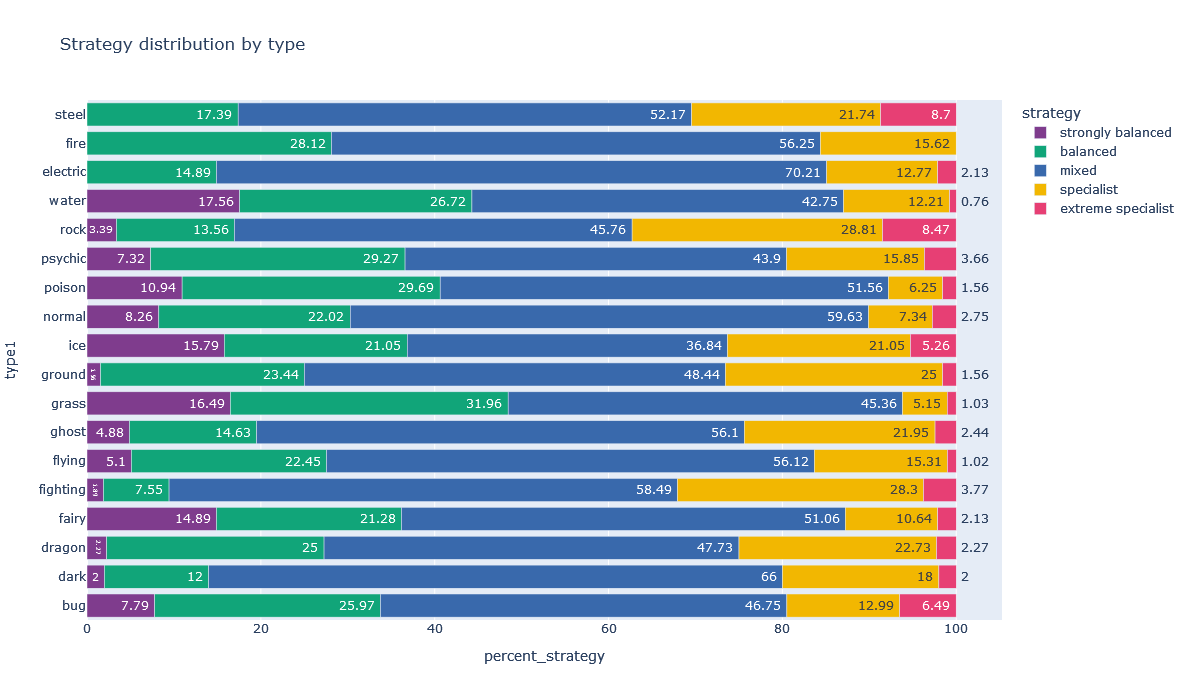

In [139]:
import plotly.express as px
df_plot = df_str2
fig = px.bar(df_plot, x="percent_strategy", y="type1", color='strategy', orientation='h',
             #hover_data=["tip", "size"],
             height=700, width = 1200, text='percent_strategy',
        color_discrete_sequence= px.colors.qualitative.Bold,
             category_orders={"strategy": ["strongly balanced","balanced", "mixed","specialist", "extreme specialist"]},
             title='Strategy distribution by type')
fig.show()

#### Although there are no types with only one dominant strategy and all strategies are present in most of the types with different proportions. **Generally balanced strategy** seem to be dominant in * Grass* and *Water* types and quite substantial in *Bug*, *Fairy*, *Poison* and *Psychic*. The types with high proportion of **Generally specialist strategy** are *Rock*, *Steel* and *Fighting*.

In [83]:
# plotting spiderplots with examples of the above startegies

import plotly.graph_objects as go
from plotly.subplots import make_subplots

sb = df_spider.loc['Dewgong']  # diff = 4
b = df_spider.loc['Diggersby'] # diff = 20
m = df_spider.loc['Togekiss']  # diff = 35
s = df_spider.loc['Swellow']   # diff = 55
esa= df_spider.loc['Kartana']  # diff = 93
esd =df_spider.loc['Shuckle']  # diff = 100
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','speed']

fig = make_subplots(rows=3, cols=2, specs=[[{'type': 'polar'}]*2]*3)

fig.add_trace(go.Scatterpolar(
      name = "STRONGLY BALANCED   Dewgong:     water | ice",
      r = [sb['speed'].values[0],
             sb['attack'].values[0],
             sb['sp_attack'].values[0],
             sb['defense'].values[0],
             sb['sp_defense'].values[0],sb['speed'].values[0]],
      theta = theta, 
    ), 1, 1)

fig.add_trace(go.Scatterpolar(
      name = "BALANCED                   Diggersby:     ground | normal",
      r = [b['speed'].values[0],
             b['attack'].values[0],
             b['sp_attack'].values[0],
             b['defense'].values[0],
             b['sp_defense'].values[0],b['speed'].values[0]],
      theta = theta, 
    ), 1, 2)

fig.add_trace(go.Scatterpolar(
      name = "MIXED                         Togekiss:        flying | fairy",
      r = [m['speed'].values[0],
             m['attack'].values[0],
             m['sp_attack'].values[0],
             m['defense'].values[0],
             m['sp_defense'].values[0],m['speed'].values[0]],
      theta = theta, 
     
    ),2, 1)

fig.add_trace(go.Scatterpolar(
      name = "SPECIALIST                  Swellow:        flying | normal",
      r = [s['speed'].values[0],
             s['attack'].values[0],
             s['sp_attack'].values[0],
             s['defense'].values[0],
             s['sp_defense'].values[0],s['speed'].values[0]],
      theta = theta, 
     
    ),2, 2)
fig.add_trace(go.Scatterpolar(
      name = "EXTREME SPECIALIST ATTACK       Kartana:   steel | grass   ",
      r = [esa['speed'].values[0],
             esa['attack'].values[0],
             esa['sp_attack'].values[0],
             esa['defense'].values[0],
             esa['sp_defense'].values[0],esa['speed'].values[0]],
      theta = theta,
     
    ), 3, 1)

fig.add_trace(go.Scatterpolar(
      name = "EXTREME SPECIALIST DEFENSE     Shuckle:      bug | rock ",
      r = [esd['speed'].values[0],
             esd['attack'].values[0],
             esd['sp_attack'].values[0],
             esd['defense'].values[0],
             esd['sp_defense'].values[0],esd['speed'].values[0]],
      theta = theta,
     
    ), 3,2)


fig.update_traces(fill='toself')
fig.update_layout(width=1200, height=1200,
    polar1 = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    polar3 = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
     polar4 = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
     polar5 = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
     polar6 = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),              
)

fig.show(renderer='iframe_connected')
    
  

#### Chosen examples of 5 strategies:
-  **Strongly balanced** where the difference between max and min value of normalized statistics is less than 15, seems this strategy is more frequent in types with generally lower combat statistics like *Ice*, *Fairy*, *Grass*, and *Water*, and completly absent in *Steel*, *Fire* and *Electric*.
-  **Balanced** where the difference between max and min value of normalized statistics is between 15-25, seems to be more frequent again in *Water*, *Grass*, as well as *Poison* and *Bug*.
-  **Mixed** where the difference between max and min value of normalized statistics is between 25-45,the most frequent strategy in all types, but especially dominant in *Electric* and *Dark*, and least frequent in *Ice*
-  **Specialist** where the difference between max and min value of normalized statistics is between 45-65, seems to be most frequent in *Fighting* and *Rock* types, that have generally high either **Attack** or **Defense** statistics. It is least frequent in *Grass*, *Poison* and *Normal* - againt types with generally lower combat statistis.
-  **Extreme Specialist** where the difference between max and min value of normalized statistics is between 65-100, seems to be most frequent in *Steel* and *Rock* types which have high **Defense** statistics (so we can observe an example of an extreme specialist in **Defense**), and suprisingly also in *Bug* - which is the second example of an extreme specialist in **Attack**. This strategy is least frequent in *Fire* - completely absent as well as the types with generally low combat statistics such as *Water*, *Grass*, *Poison*, *Ground* as well as *Flying*.


In [84]:
# preparing dataframe to plot the values of difference against base total
column1 =df_normalized[['base_total']].reset_index().drop('is_legendary', axis=1)
column1 =column1.set_index(['name', 'type1']).sort_index()

In [85]:
column2 =df_normalized[['weight_kg']].reset_index().drop('is_legendary', axis=1)
column2 =column2.set_index(['name', 'type1']).sort_index()

In [86]:
df_corr1 =df_strategy.set_index(['name','type1']).sort_index()

In [87]:
df_corr1 = df_corr1.join(column1)

In [88]:
df_corr1 = df_corr1.join(column2)

In [89]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df_corr1, x = 'base_total', y='diff', hue ='is_legendary')
sns.regplot(data = df_corr1, x = 'base_total', y='diff', fit_reg = True, scatter=False)

<AxesSubplot: xlabel='base_total', ylabel='diff'>

In [90]:
df_corr1['diff'].corr(df_corr1['base_total'])

0.4939857552642035

#### There seem to be moderate positive correlatione between base total and the value of difference which translate to strategy, the lower base total the lower difference, meaning the more balanced strategy.

<AxesSubplot: xlabel='attack', ylabel='diff'>

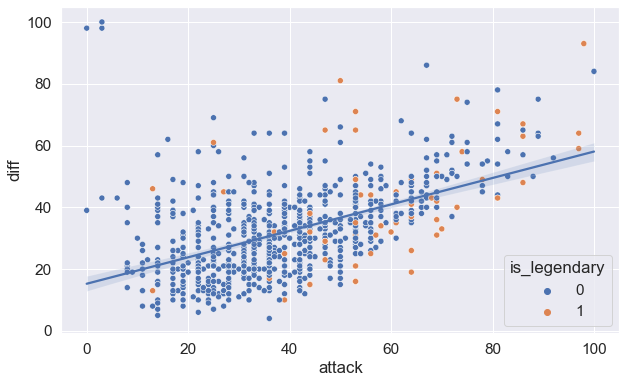

In [91]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df_corr1, x = 'attack', y='diff', hue ='is_legendary')
sns.regplot(data = df_corr1, x = 'attack', y='diff', fit_reg = True, scatter=False)

In [92]:
df_corr1['diff'].corr(df_corr1['attack'])

0.5348696704382271

#### This correlation seems to be most strongly reflected by value of **Attack**, meaning the stronger attack, the riskier specialist strategy. 

In [93]:
df_corr1.columns

Index(['is_legendary', 'attack', 'defense', 'hp', 'sp_attack', 'sp_defense',
       'speed', 'max', 'min', 'diff', 'strategy', 'base_total', 'weight_kg'],
      dtype='object')

In [94]:
# plotting heatmap of correlations with difference between min and max value of 6 combat statistics included
df_corr2 = df_corr1[['attack', 'defense', 'hp', 'sp_attack', 'sp_defense',
       'speed', 'diff', 'base_total', 'weight_kg']]
plt.figure(figsize=(15,10))
corr =  df_corr2.corr()
matrix = np.triu(corr)
sns.heatmap(df_corr2.corr(),annot=True, mask=matrix,vmin=-1,vmax=1, cmap= 'vlag' ).set_title('Korelacja między cechami')
#plt.show()

Text(0.5, 1.0, 'Korelacja między cechami')

#### The difference between min and max value of 6 combat statistics (which translates to strategy), is weakly correlated with most of features except for wweak to moderate corelation with **Attack** (r=0.53) and **Defense** (r=0,38)

## 10) Visual examples of 6 combat statistics distribution among 4 strongest and 4 weakest pokemon

In [95]:
df_normalized.sort_values(by='base_total', ascending = False).head(6)

attack  base_total  capture_rate  defense   
name     type1   is_legendary                                              
Mewtwo   psychic 1               81.0       100.0           0.0     29.0  \
Rayquaza flying  1               97.0       100.0          17.0     42.0   
         dragon  1               97.0       100.0          17.0     42.0   
Kyogre   water   1               81.0        98.0           0.0     38.0   
Groudon  ground  1               97.0        98.0           0.0     69.0   
Arceus   normal  1               64.0        90.0           0.0     51.0   

                               height_m    hp  sp_attack  sp_defense  speed   
name     type1   is_legendary                                                 
Mewtwo   psychic 1                 13.0  41.0      100.0        48.0   77.0  \
Rayquaza flying  1                 48.0  41.0       92.0        38.0   63.0   
         dragon  1                 48.0  41.0       92.0        38.0   63.0   
Kyogre   water   1                 31.0  39.0       92.0        67.0   49.0   
Groudon  ground  1                 24.0  39.0       76.0        33.0   49.0   
Arceus   normal  1                 22.0  47.0       60.0        48.0   66.0   

                               weight_kg  
name     type1   is_legendary             
Mewtwo   psychic 1                  12.0  
Rayquaza flying  1                  21.0  
         dragon  1                  21.0  
Kyogre   water   1                  35.0  
Groudon  ground  1                  95.0  
Arceus   normal  1                  32.0

In [96]:
df.sort_values(by='base_total', ascending =False).head(6)

name                          abilities  against_bug  against_dark   
149    Mewtwo            ['Pressure', 'Unnerve']          2.0           2.0  \
383  Rayquaza                       ['Air Lock']          0.5           1.0   
382   Groudon                        ['Drought']          1.0           1.0   
381    Kyogre                        ['Drizzle']          1.0           1.0   
492    Arceus                      ['Multitype']          1.0           1.0   
717   Zygarde  ['Aura Break', 'Power Construct']          1.0           1.0   

     against_dragon  against_electric  against_fairy  against_fight   
149             1.0               1.0            1.0            0.5  \
383             2.0               1.0            2.0            0.5   
382             1.0               0.0            1.0            1.0   
381             1.0               2.0            1.0            1.0   
492             1.0               1.0            1.0            2.0   
717             2.0               0.0            2.0            1.0   

     against_fire  against_flying  ...  speed    type1   type2  weight_kg   
149           1.0             1.0  ...    140  psychic    None      122.0  \
383           0.5             1.0  ...    115   dragon  flying      206.5   
382           1.0             1.0  ...     90   ground    None      950.0   
381           0.5             1.0  ...     90    water    None      352.0   
492           1.0             1.0  ...    120   normal    None      320.0   
717           0.5             1.0  ...     85   dragon  ground      284.6   

     generation  is_legendary  tot_abilities  type_binary           type   
149           1             1              2         None        psychic  \
383           3             1              1          Yes  dragon flying   
382           3             1              1         None         ground   
381           3             1              1         None          water   
492           4             1              1         None         normal   
717           6             1              2          Yes  dragon ground   

     avg_multiplier  
149        1.111111  
383        1.125000  
382        1.055556  
381        1.000000  
492        1.000000  
717        1.138889  

[6 rows x 42 columns]

In [97]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = df_spider.loc['Rayquaza']
y = df_spider.loc['Kyogre']
z= df_spider.loc['Mewtwo']
k =df_spider.loc['Shuckle']
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','hp','speed']

fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'polar'}]*2]*2)

fig.add_trace(go.Scatterpolar(
      name = "Rayquaza",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],x['hp'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "Kyogre",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],y['hp'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)
fig.add_trace(go.Scatterpolar(
      name = "Mewtwo",
      r = [z['speed'].values[0],
             z['attack'].values[0],
             z['sp_attack'].values[0],
             z['defense'].values[0],
             z['sp_defense'].values[0],z['hp'].values[0],z['speed'].values[0]],
      theta = theta,
     
    ), 2, 1)
fig.add_trace(go.Scatterpolar(
      name = "Shuckle",
      r = [k['speed'].values[0],
             k['attack'].values[0],
             k['sp_attack'].values[0],
             k['defense'].values[0],
             k['sp_defense'].values[0],k['hp'].values[0],k['speed'].values[0]],
      theta = theta,
     
    ), 2,2)


fig.update_traces(fill='toself')
fig.update_layout(width=1000, height=800,
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    polar3 = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
     polar4 = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),

)

fig.show(renderer='iframe_connected')
    
  

In [98]:
df_normalized.sort_values(by='base_total').head(10)

attack  base_total  capture_rate  defense   
name      type1   is_legendary                                              
Sunkern   grass   0               14.0         0.0          92.0     11.0  \
Azurill   fairy   0                8.0         2.0          58.0     16.0   
Wurmple   bug     0               22.0         2.0         100.0     13.0   
Kricketot bug     0               11.0         2.0         100.0     16.0   
Azurill   normal  0                8.0         2.0          58.0     16.0   
Weedle    bug     0               17.0         2.0         100.0     11.0   
          poison  0               17.0         2.0         100.0     11.0   
Caterpie  bug     0               14.0         2.0         100.0     13.0   
Ralts     fairy   0               11.0         3.0          92.0      9.0   
          psychic 0               11.0         3.0          92.0      9.0   

                                height_m    hp  sp_attack  sp_defense  speed   
name      type1   is_legendary                                                 
Sunkern   grass   0                  1.0  11.0       11.0         5.0   14.0  \
Azurill   fairy   0                  1.0  19.0        5.0        10.0    9.0   
Wurmple   bug     0                  1.0  17.0        5.0         5.0    9.0   
Kricketot bug     0                  1.0  14.0        8.0        10.0   11.0   
Azurill   normal  0                  1.0  19.0        5.0        10.0    9.0   
Weedle    bug     0                  1.0  15.0        5.0         0.0   26.0   
          poison  0                  1.0  15.0        5.0         0.0   26.0   
Caterpie  bug     0                  1.0  17.0        5.0         0.0   23.0   
Ralts     fairy   0                  2.0  11.0       19.0         7.0   20.0   
          psychic 0                  2.0  11.0       19.0         7.0   20.0   

                                weight_kg  
name      type1   is_legendary             
Sunkern   grass   0                   0.0  
Azurill   fairy   0                   0.0  
Wurmple   bug     0                   0.0  
Kricketot bug     0                   0.0  
Azurill   normal  0                   0.0  
Weedle    bug     0                   0.0  
          poison  0                   0.0  
Caterpie  bug     0                   0.0  
Ralts     fairy   0                   1.0  
          psychic 0                   1.0

In [99]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = df_spider.loc['Sunkern']
y = df_spider.loc['Azurill']
z= df_spider.loc['Wurmple']
k =df_spider.loc['Weedle']
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','hp','speed']

fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'polar'}]*2]*2)

fig.add_trace(go.Scatterpolar(
      name = "'Sunkern",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],x['hp'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "Azurill",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],y['hp'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)
fig.add_trace(go.Scatterpolar(
      name = "Wurmple",
      r = [z['speed'].values[0],
             z['attack'].values[0],
             z['sp_attack'].values[0],
             z['defense'].values[0],
             z['sp_defense'].values[0],z['hp'].values[0],z['speed'].values[0]],
      theta = theta,
     
    ), 2, 1)
fig.add_trace(go.Scatterpolar(
      name = "Weedle",
      r = [k['speed'].values[0],
             k['attack'].values[0],
             k['sp_attack'].values[0],
             k['defense'].values[0],
             k['sp_defense'].values[0],k['hp'].values[0],k['speed'].values[0]],
      theta = theta,
     
    ), 2,2)


fig.update_traces(fill='toself')
fig.update_layout(width=1000, height=800,
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 50]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 50]),
    ),
    polar3 = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 50]),
    ),
     polar4 = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 50]),
    ),

)

fig.show(renderer='iframe_connected')
    
  